# **New York City Taxi & Limousine Commission 2023**

### *Data Analysis and Data Visualization*

`Disclaimer: This capstone project serves as a crucial component of the educational and assessment sequence in Job Connector Data Science and Machine Learning Program at Purwadhika Start-up and Coding School.`

---

**Author:** Arief Luqman Hakiem <br>
**Batch:** JCDS 2404 <br>
**Date Submitted:** `2024-07-05` <br>
**Data Source:** [Green Taxi Trip Record](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N) and [Taxi Zone Lookup](https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv)

<div align="center">
    <img src="https://www.nyc.gov/assets/tlc/images/content/pages/about/drivenyctaxi-pic.jpg" alt="Banner NYC TLC">
    <br>
    <medium>Green Taxi and Yellow Taxi in New York City managed by TLC</medium>
</div>

<div style="text-align: center;">
    <h1><strong>Table of Contents</strong><h1>
</div>

1. [Introduction](#part-i-introduction)
2. [Data Understanding](#part-ii-data-understanding)
3. [Data Cleaning](#part-iii-data-cleaning)
4. [Data Analysis and Visualization](#part-iv-data-analysis-and-visualization)
5. [Conclusion and Recommendation](#part-v-conclusion-and-recommendation)

# **Part I. Introduction**

text

---

### ***Background***

text

### ***Problem Statement***

text

### ***Problem Boundaries***

text

### ***Objective Goals***

text

### ***Stakeholder***

text

In [99]:
# Importing Library

# Data Manipulation and Analysis
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and working with arrays

# Date and Time Handling
import datetime as dt  # For working with dates and times

# Data Visualization
import matplotlib.pyplot as plt # For static, interactive, and animated visualizations
import seaborn as sns
import plotly.express as px  # For quick and easy data visualization
import plotly.graph_objects as go  # For creating detailed and customizable plots

# Visualization Mapping
import folium # For creating interactive maps

# Statistical Testing
from scipy import stats

# Warning Control
import warnings  # For controlling the display of warnings
warnings.filterwarnings('ignore')  # Ignore warnings

# **Part II. Data Understanding**

text

---

### **Read and Check Info Dataset**

In [2]:
# Read Dataset Trip Record
trip = pd.read_csv("trip_record.csv", 
                   parse_dates=['lpep_pickup_datetime', 'lpep_dropoff_datetime'])

# Display First 5 Rows and Show Shape of Dataset
display(trip.head(), trip.shape)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


(68211, 20)

In [3]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

**Information New York City TLC Trip Record Data Dictionary:**

| Feature                | Description                                                                                  |
|------------------------|----------------------------------------------------------------------------------------------|
| `VendorID`             | A code indicating the LPEP provider that provided the record.                                |
|                        | `1 = Creative Mobile Technologies, LLC.`<br>`2 = VeriFone Inc.`                              |
| `lpep_pickup_datetime` | The date and time when the meter was engaged.                                                |
| `lpep_dropoff_datetime`| The date and time when the meter was disengaged.                                             |
| `Passenger_count`      | The number of passengers in the vehicle. This is a driver-entered value.                     |
| `Trip_distance`        | The elapsed trip distance in miles reported by the taximeter.                                |
| `PULocationID`         | TLC Taxi Zone in which the taximeter was engaged.                                            |
| `DOLocationID`         | TLC Taxi Zone in which the taximeter was disengaged.                                         |
| `RateCodeID`           | The final rate code in effect at the end of the trip.                                        |
|                        | `1 = Standard rate`<br>`2 = JFK`<br>`3 = Newark`<br>`4 = Nassau or Westchester`<br>`5 = Negotiated fare`<br>`6 = Group ride` |
| `Store_and_fwd_flag`   | This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka "store and forward," because the vehicle did not have a connection to the server. |
|                        | `Y = store and forward trip`<br>`N = not a store and forward trip`                           |
| `Payment_type`         | A numeric code signifying how the passenger paid for the trip.                               |
|                        | `1 = Credit card`<br>`2 = Cash`<br>`3 = No charge`<br>`4 = Dispute`<br>`5 = Unknown`<br>`6 = Voided trip` |
| `Fare_amount`          | The time-and-distance fare calculated by the meter.                                          |
| `Extra`                | Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges. |
| `MTA_tax`              | $0.50 MTA tax that is automatically triggered based on the metered rate in use.              |
| `Improvement_surcharge`| $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015. |
| `Tip_amount`           | This field is automatically populated for credit card tips. Cash tips are not included.      |
| `Tolls_amount`         | The total amount of all tolls paid in the trip.                                              |
| `Total_amount`         | The total amount charged to passengers. Does not include cash tips.                          |
| `Trip_type`            | A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver. |
|                        | `1 = Street-hail`<br>`2 = Dispatch`                                                          |


In [4]:
# Read Dataset Zone Lookup
zone = pd.read_csv("zone_lookup.csv")

# Display First 5 Rows and Show Shape of Dataset
display(zone.head(), zone.shape)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


(265, 4)

In [5]:
zone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


**Information Zone Lookup Data Dictionary:**

| Feature         | Description                                                    |
|-----------------|----------------------------------------------------------------|
| `LocationID`    | A unique identifier for each location.                        |
| `Borough`       | The borough in New York City where the location is situated.  |
| `Zone`          | The specific zone within the borough.                         |
| `service_zone`  | The type of service zone. Unique values include:              |
|                 | `EWR = Newark Airport`<br>`Boro Zone`<br>`Yellow Zone`<br>`Green Zone` |


### **Change Column Value**

In [6]:
# Column RateCodeID
ratecodeid = {1: 'Standard rate', 2: 'JFK Airport', 3: 'Newark Airport', 4: 'Westchester Village/Nassau', 5: 'Negotiated fare', 6: 'Group ride'}
trip['RatecodeID'] = trip['RatecodeID'].replace(ratecodeid)

# Column Payment_type
payment_type = {1: 'Credit card', 2: 'Cash', 3: 'No charge',4: 'Dispute', 5: 'Unknown', 6: 'Voided trip'}
trip['payment_type'] = trip['payment_type'].replace(payment_type)

# Column Trip_type
trip_type = {1: 'street hail', 2: 'dispatch'}
trip['trip_type'] = trip['trip_type'].replace(trip_type)

### **Add New Column**

In [7]:
# Add Column Day
daycolumn = trip['lpep_pickup_datetime'].dt.day_name()
trip.insert(3,'day',daycolumn)

In [8]:
# Add Column Trip Duration
trip['lpep_pickup_datetime'] = pd.to_datetime(trip['lpep_pickup_datetime'], format=r'%Y-%m-%d %H:%M:%S')
trip['lpep_dropoff_datetime'] = pd.to_datetime(trip['lpep_dropoff_datetime'], format=r'%Y-%m-%d %H:%M:%S')

duration = (trip['lpep_dropoff_datetime'] - trip['lpep_pickup_datetime']).dt.total_seconds() / 60
trip.insert(6,'duration_min',duration.round(2))

In [9]:
# Splitting the column into date and name
PUdate = pd.to_datetime(trip['lpep_pickup_datetime']).dt.date
PUtime = pd.to_datetime(trip['lpep_pickup_datetime']).dt.time
DOdate = pd.to_datetime(trip['lpep_dropoff_datetime']).dt.date
DOtime = pd.to_datetime(trip['lpep_dropoff_datetime']).dt.time


In [10]:
# Inserting new columns
trip.insert(3,'PUdate',PUdate)
trip.insert(4,'DOdate',DOdate)
trip.insert(5,'PUtime',PUtime)
trip.insert(6,'DOtime',DOtime)

trip.drop(columns=['lpep_pickup_datetime','lpep_dropoff_datetime'], inplace=True)

### **Merge Two Dataset Trip and Zone**

In [11]:
location = zone[['LocationID', 'Zone', 'Borough']]
location.drop(index=[263, 264], inplace=True)
location

,LocationID,Zone,Borough
0,1,Newark Airport,EWR
1,2,Jamaica Bay,Queens
2,3,Allerton/Pelham Gardens,Bronx
3,4,Alphabet City,Manhattan
4,5,Arden Heights,Staten Island
...,...,...,...
258,259,Woodlawn/Wakefield,Bronx
259,260,Woodside,Queens
260,261,World Trade Center,Manhattan
261,262,Yorkville East,Manhattan


In [17]:
# Merging to extract the pickup zone and borough 
trip = trip.merge(location.set_index('LocationID'), left_on='PULocationID', how='left', right_index=True)
trip.rename(columns={'Zone':'PUzone','Borough':'PUborough'},inplace=True)


# Merging to extract the dropoff zone and borough 
trip= trip.merge(location.set_index('LocationID'), left_on='DOLocationID', how='left', right_index=True)
trip.rename(columns={'Zone':'DOzone','Borough':'DOborough'},inplace=True)

In [19]:
trip = trip[['PUdate', 'DOdate', 'PUtime', 'DOtime', 'day', 'RatecodeID', 
     'PUzone', 'PUborough',
    'DOzone', 'DOborough', 'duration_min',
    'passenger_count', 'trip_distance', 'fare_amount', 'tip_amount','congestion_surcharge',
    'total_amount', 'payment_type', 'trip_type']]

# **Part III. Data Cleaning**

text

---

### **Exploratory Data Analysis**

In [21]:
# Function Checking Data
def columnindex(x):
    listItem = []
    for col in x.columns :
        listItem.append( [col, x[col].nunique(),x[col].isna().any(),x[col].dtypes,x[col].unique() ])

    tabeldesc = pd.DataFrame(columns=['Column Name', 'Number of Unique','isna','dtype','Unique Sample'],
                         data=listItem)
    tabeldesc
    return tabeldesc

In [22]:
columnindex(trip)

,Column Name,Number of Unique,isna,dtype,Unique Sample
0,PUdate,34,False,object,"[2023-01-01, 2022-12-09, 2023-01-02, 2023-01-0..."
1,DOdate,34,False,object,"[2023-01-01, 2023-01-02, 2022-12-09, 2023-01-0..."
2,PUtime,41521,False,object,"[00:26:10, 00:51:03, 00:35:12, 00:13:14, 00:33..."
3,DOtime,41484,False,object,"[00:37:11, 00:57:49, 00:41:32, 00:19:03, 00:39..."
4,day,7,False,object,"[Sunday, Friday, Monday, Tuesday, Wednesday, T..."
5,RatecodeID,6,True,object,"[Standard rate, Negotiated fare, Westchester V..."
6,PUzone,223,True,object,"[Morningside Heights, Bloomingdale, Steinway, ..."
7,PUborough,6,True,object,"[Manhattan, Queens, Brooklyn, Bronx, nan, Stat..."
8,DOzone,246,True,object,"[Lincoln Square West, Central Park, Old Astori..."
9,DOborough,6,True,object,"[Manhattan, Queens, Brooklyn, nan, Bronx, Stat..."


In [23]:
trip.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
duration_min,68211.0,18.097274,74.925634,0.00,7.22,11.40,17.48,1439.88
passenger_count,63887.0,1.315870,0.979054,0.00,1.00,1.00,1.00,9.00
trip_distance,68211.0,8.114852,585.105955,0.00,1.11,1.85,3.21,120098.84
fare_amount,68211.0,16.603545,13.470121,-70.00,9.30,13.50,19.80,490.00
tip_amount,68211.0,2.139012,3.052710,-10.50,0.00,1.60,3.33,222.22
congestion_surcharge,63887.0,0.726748,1.212836,-2.75,0.00,0.00,2.75,2.75
total_amount,68211.0,21.789377,15.457115,-71.50,12.90,17.90,26.15,491.00


### **Missing Value and Outliers**

In [26]:
trip[trip.isna().any(axis=1)]

,PUdate,DOdate,PUtime,DOtime,day,RatecodeID,PUzone,PUborough,DOzone,DOborough,duration_min,passenger_count,trip_distance,fare_amount,tip_amount,congestion_surcharge,total_amount,payment_type,trip_type
31,2023-01-01,2023-01-01,00:46:48,01:08:17,Sunday,Westchester Village/Nassau,Forest Hills,Queens,NaN,NaN,21.48,1.0,10.44,47.10,9.92,0.0,59.52,Credit card,street hail
115,2023-01-01,2023-01-01,01:52:58,01:53:00,Sunday,Standard rate,NaN,NaN,NaN,NaN,0.03,1.0,0.00,3.00,21.50,0.0,26.30,Credit card,street hail
166,2023-01-01,2023-01-01,02:37:12,02:37:15,Sunday,Negotiated fare,Co-Op City,Bronx,NaN,NaN,0.05,3.0,0.00,40.00,0.00,0.0,41.00,Credit card,dispatch
173,2023-01-01,2023-01-01,02:37:12,02:37:15,Sunday,Negotiated fare,Woodside,Queens,NaN,NaN,0.05,1.0,0.00,20.00,4.20,0.0,25.20,Credit card,dispatch
186,2023-01-01,2023-01-01,03:01:54,03:01:56,Sunday,Negotiated fare,Jackson Heights,Queens,NaN,NaN,0.03,1.0,0.00,12.00,0.00,0.0,13.00,Credit card,dispatch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2023-01-31,2023-01-31,22:29:00,22:42:00,Tuesday,NaN,Clinton Hill,Brooklyn,Crown Heights South,Brooklyn,13.00,NaN,4070.82,15.70,0.00,NaN,16.70,NaN,NaN
68207,2023-01-31,2023-01-31,22:40:00,22:48:00,Tuesday,NaN,Baisley Park,Queens,Saint Albans,Queens,8.00,NaN,2.14,4.41,0.00,NaN,5.41,NaN,NaN
68208,2023-01-31,2023-02-01,23:46:00,00:02:00,Tuesday,NaN,DUMBO/Vinegar Hill,Brooklyn,Bushwick South,Brooklyn,16.00,NaN,3.44,16.53,3.51,NaN,21.04,NaN,NaN
68209,2023-01-31,2023-01-31,23:01:00,23:19:00,Tuesday,NaN,Stuyvesant Heights,Brooklyn,Prospect Heights,Brooklyn,18.00,NaN,3.03,14.98,3.20,NaN,19.18,NaN,NaN


***Insights***
> Other than `trip_type`, all columns that are missing datas are missing them in the same amount.
And using sampling it is concluded that most of the columns with missing data are located within the same rows.

- `PUdate` and `DOdate` : Filter the data that is not in the analysis timeframe (2023-01-1 until 2023-01-31)
- `PUzone` and `DOzone` : Dealing with outliers

- `duration_min` : Deaeling with outliers 
- `RatecodeID`: Dealing with NaN values and wrong input [99.0]
- `passenger_count`: Handling the NaN values and passengers that are off the NYC passenger limit (min=1, max-4)
- `trip_distance` : Dealing with outliers and Nan values. Assuming that the upper bound is 50 (Furthest drive in NYC)
- `fare_amount` :  Dealing with outliers and NaN values. There are some numbers that doesn't make sense (negative and overly paid). - Negative can mean out of pocket (so just make it +)
- `tip_amount` : Dealing with outliers and NaN values.
- `total_amount`: Dealing with outliers and NaN values.
- `payment_type` and `trip_type`: Dealing with NaN values.

#### `PUdate` and `DOdate`
***
Dropping and excluding data which the `PUdate` falls outside the specified analysis timeframe, which spans from January 1, 2023, to January 31, 2023.


In [27]:
trip['PUdate'] = pd.to_datetime(trip['PUdate'])
trip['DOdate'] = pd.to_datetime(trip['DOdate'])

start_date = pd.Timestamp('2023-01-01')
end_date = pd.Timestamp('2023-01-31')

In [28]:
initial = trip.copy()

# filtering the date
df = trip[(trip['PUdate'] >= start_date) & (trip['PUdate'] <= end_date)]

print(f'''
      Initial data: {len(initial)}
      Processed data: {len(df)}
      Data dropped: {len(initial)-len(df)}''')


      Initial data: 68211
      Processed data: 68207
      Data dropped: 4


#### `duration_min`
***
- The duration are limited to 60 minutes, since it is the time of NYC's in-city furthest drive.


In [29]:
df['duration_min'].min()

0.0

<Axes: xlabel='duration_min'>

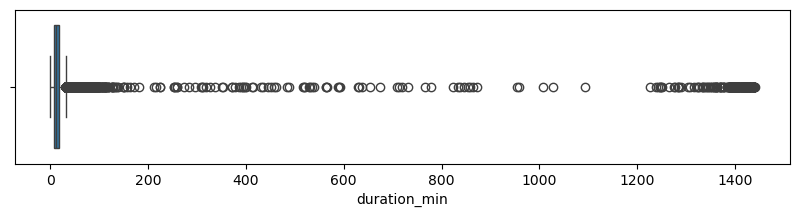

In [33]:
plt.figure(figsize=(10,2))
sns.boxplot(df['duration_min'], orient='h')

In [34]:
initial = df.copy()
df = df[(df['duration_min']<60)]

print(f'''
      Initial data: {len(initial)}
      Processed data: {len(df)}
      Data dropped: {len(initial)-len(df)}''')


      Initial data: 68207
      Processed data: 67584
      Data dropped: 623


<Axes: xlabel='duration_min'>

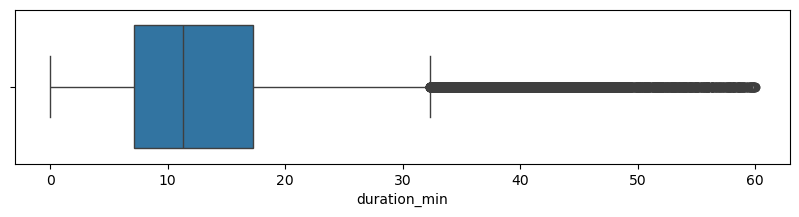

In [35]:
plt.figure(figsize=(10,2))
sns.boxplot(df['duration_min'], orient='h')

#### `PUzone` and `DOzone`
***
The filtered data pickup and dropoff location produce some NaN values because of the undetected location IDs. <br> These data will be dropped assuming that the location ID is not on NYC's taxi zone.

In [36]:
df[['PUzone','PUborough','DOzone','DOborough']].isna().sum()

PUzone       192
PUborough    192
DOzone       636
DOborough    636
dtype: int64

In [37]:
initial = df.copy()

# dropping the NaNs
df.dropna(subset=['PUzone','DOzone'], inplace=True)

print(f'''
      Initial data: {len(initial)}
      Processed data: {len(df)}
      Data dropped: {len(initial)-len(df)}''')


      Initial data: 67584
      Processed data: 66912
      Data dropped: 672


In [38]:
df[['PUzone','PUborough','DOzone','DOborough']].isna().sum()

PUzone       0
PUborough    0
DOzone       0
DOborough    0
dtype: int64

### `RatecodeID`
***
- If the Ratecode data are 99.0 then it will be assigned as NaN
- If the Drop-off Zone are one of **JFK, Newark, Westchester** it will be assigned to the respective fare.
- If the `total amount` are integers, then it will be assumed to 5 (Negotiated fare).
- If the values are neither of these criteria, it will be assigned to 1 (Standard Rate)



In [39]:
df['RatecodeID'].unique()

array(['Standard rate', 'Negotiated fare', 'Newark Airport',
       'JFK Airport', 99.0, 'Westchester Village/Nassau', nan],
      dtype=object)

In [40]:
columnshowed = ['PUdate', 'DOdate', 'PUtime', 'DOtime', 'day', 'RatecodeID','PUzone', 'PUborough', 'DOzone','DOborough'] # limiting column 
ratecode_mapping = ['Westchester Village/Unionport',  'Newark Airport',  'JFK Airport']

# Displaying the sample of NaN ratecode within the mapping
dfisna = df[df['RatecodeID'].isna()]
PUzoneNaN = dfisna[dfisna['PUzone'].isin(ratecode_mapping)][columnshowed].sort_values(by='PUzone').drop_duplicates(subset='PUzone',keep='first')
DOzoneNaN = dfisna[dfisna['DOzone'].isin(ratecode_mapping)][columnshowed].sort_values(by='DOzone').drop_duplicates(subset='DOzone',keep='first')
ratecodeNaNsample = pd.concat([PUzoneNaN,DOzoneNaN])

ratecodeNaNsample

,PUdate,DOdate,PUtime,DOtime,day,RatecodeID,PUzone,PUborough,DOzone,DOborough
66609,2023-01-20,2023-01-20,12:17:00,12:18:00,Friday,NaN,JFK Airport,Queens,JFK Airport,Queens
65394,2023-01-12,2023-01-12,10:22:00,10:46:00,Thursday,NaN,Westchester Village/Unionport,Bronx,Claremont/Bathgate,Bronx
63983,2023-01-01,2023-01-01,08:01:00,08:29:00,Sunday,NaN,Bedford,Brooklyn,JFK Airport,Queens
64952,2023-01-09,2023-01-09,04:06:00,04:58:00,Monday,NaN,Forest Hills,Queens,Newark Airport,EWR
68048,2023-01-30,2023-01-30,17:03:00,17:29:00,Monday,NaN,East Harlem South,Manhattan,Westchester Village/Unionport,Bronx


In [41]:
# changing the 99.0 values to NaN
df['RatecodeID'] = np.where(df['RatecodeID']==99, np.nan, df['RatecodeID'])

# Imputating all the NaN values based on the criteria
df['RatecodeID'] = np.where(
df['RatecodeID'].isna(),
np.where(df['DOzone'].isin(ratecode_mapping),
df['DOzone'],
np.where(df['PUzone'].isin(ratecode_mapping),
df['PUzone'],
np.where(df['total_amount'] % 1 == 0,
'Negotiated fare', 'Standard rate'))),df['RatecodeID'])

In [42]:
df['RatecodeID'].unique()

array(['Standard rate', 'Negotiated fare', 'Newark Airport',
       'JFK Airport', 'Westchester Village/Nassau',
       'Westchester Village/Unionport'], dtype=object)

### `passenger_count`
***
- If the values are below 1 and NaN, the data will be assigned to 1 (minimum passenger counts) 
- If passengers that are off the NYC passenger limit, the data will be assigned to the NYC maximum passenger limit = 4

In [43]:
sorted(df['passenger_count'].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, nan]

In [44]:
df['passenger_count'].isna().sum()

4273

In [45]:
df['passenger_count'] = np.where((df['passenger_count'] > 4) | (np.isnan(df['passenger_count'])), 4, np.where(df['passenger_count']<1, 1, df['passenger_count']))

In [47]:
sorted(df['passenger_count'].unique())

[1.0, 2.0, 3.0, 4.0]

### `trip_distance`
***
- Assuming the upper bound is 50 (Furthest drive in NYC)
- If the values are outside the upper bound and the fare amount, it will be dropped. Because in this analysis we are primarily focusing on the taxi rides inside of NYC.
- If the values are below 1 the data will be dropped. Since it is assumed that it was unlikely and has no significant correlation with other columns, therefore it is hard to predict the imputation

In [48]:
df.corr(numeric_only='True')['trip_distance']

duration_min            0.010857
passenger_count         0.025305
trip_distance           1.000000
fare_amount             0.013984
tip_amount              0.003238
congestion_surcharge    0.088272
total_amount            0.012479
Name: trip_distance, dtype: float64

<Axes: xlabel='trip_distance'>

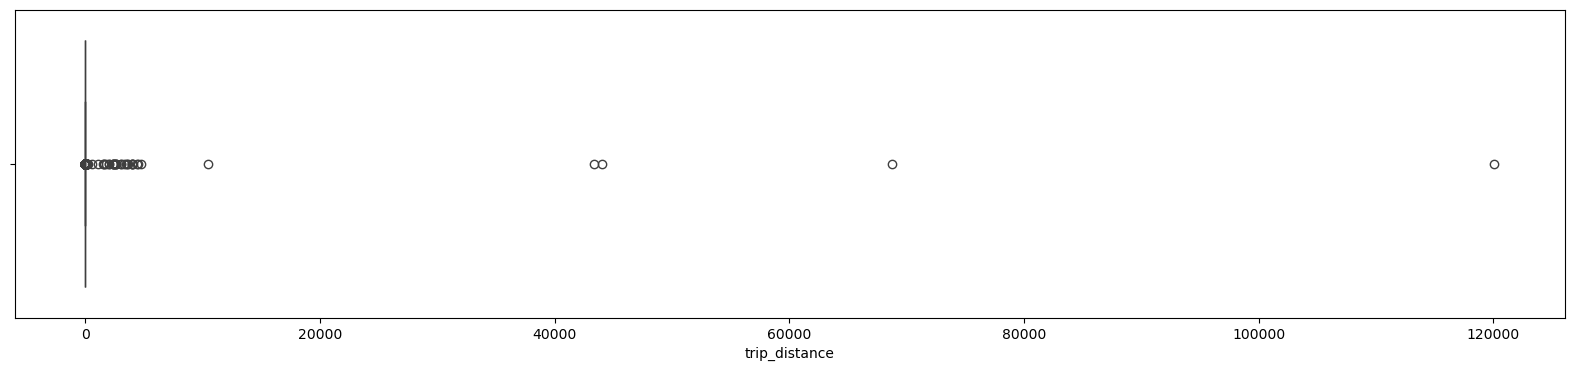

In [49]:
plt.figure(figsize=(20,4))
sns.boxplot(df['trip_distance'], orient='h')

In [50]:
initial = df.copy()

# converting the 0 to NaN and dropping them
df['trip_distance'] = np.where(df['trip_distance']>50 , np.nan, df['trip_distance'])
df.dropna(subset=['trip_distance'], inplace=True)


print(f'''
      Initial data: {len(initial)}
      Processed data: {len(df)}
      Data dropped: {len(initial)-len(df)}''')


      Initial data: 66912
      Processed data: 66875
      Data dropped: 37


<Axes: xlabel='trip_distance'>

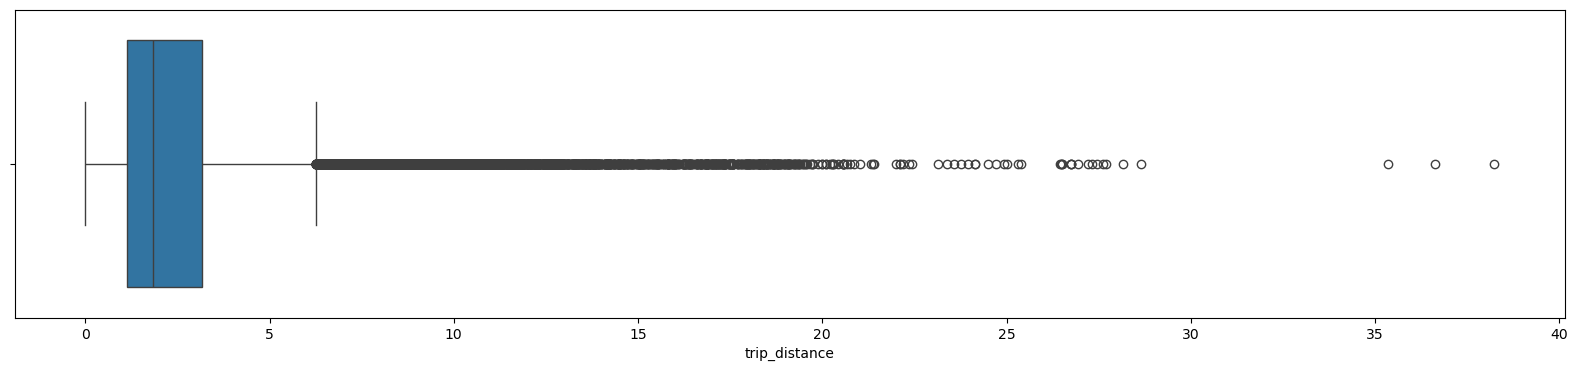

In [51]:
plt.figure(figsize=(20,4))
sns.boxplot(df['trip_distance'], orient='h')

> There are still outliers in the data, primarily due to the occasional occurrence of extended trips across NYC, despite the majority of trips being of shorter duration.

In [52]:
df[df['trip_distance'] == df['trip_distance'].max()]['fare_amount']

40942    140.2
Name: fare_amount, dtype: float64

### `fare_amount` :  
***
- If the fare amount is negative, then it will be assigned to it's absolute counterparts (positive)
- If the fare amount is more than 150 then it will considered an outliers, and will be dropped.
- If the fare amount in $ 1.5 it will be considered not significant enough for the data, and will be dropped.

> The fare amount of the longest trip distance is 140

In [53]:
initial = df.copy()

# converting the 0 to NaN and dropping them
df['fare_amount'] = np.where(df['fare_amount']<0, df['fare_amount']*-1,
                    np.where((df['fare_amount']>150) | (df['fare_amount']<=1.5), np.nan, 
                     df['fare_amount']
                             )) 

df.dropna(subset='fare_amount', inplace=True)

print(f'''
      Initial data: {len(initial)}
      Processed data: {len(df)}
      Data dropped: {len(initial)-len(df)}''')


      Initial data: 66875
      Processed data: 66783
      Data dropped: 92


- Looking the correlation between fare and total

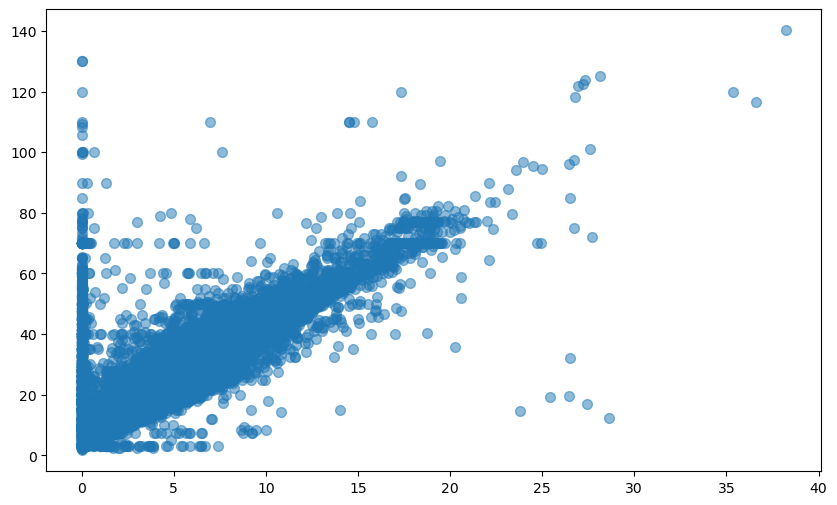

In [54]:
a = df[['fare_amount','trip_distance']]
# plt.scatter(y=df['fare_amount'],x=df['trip_distance'], scatter_kws={'alpha':0.5})

plt.figure(figsize=(10, 6))
plt.scatter(y=df['fare_amount'],x=df['trip_distance'], alpha=0.5, s=50)

In [55]:
df.RatecodeID.unique()[0:5]

array(['Standard rate', 'Negotiated fare', 'Newark Airport',
       'JFK Airport', 'Westchester Village/Nassau'], dtype=object)

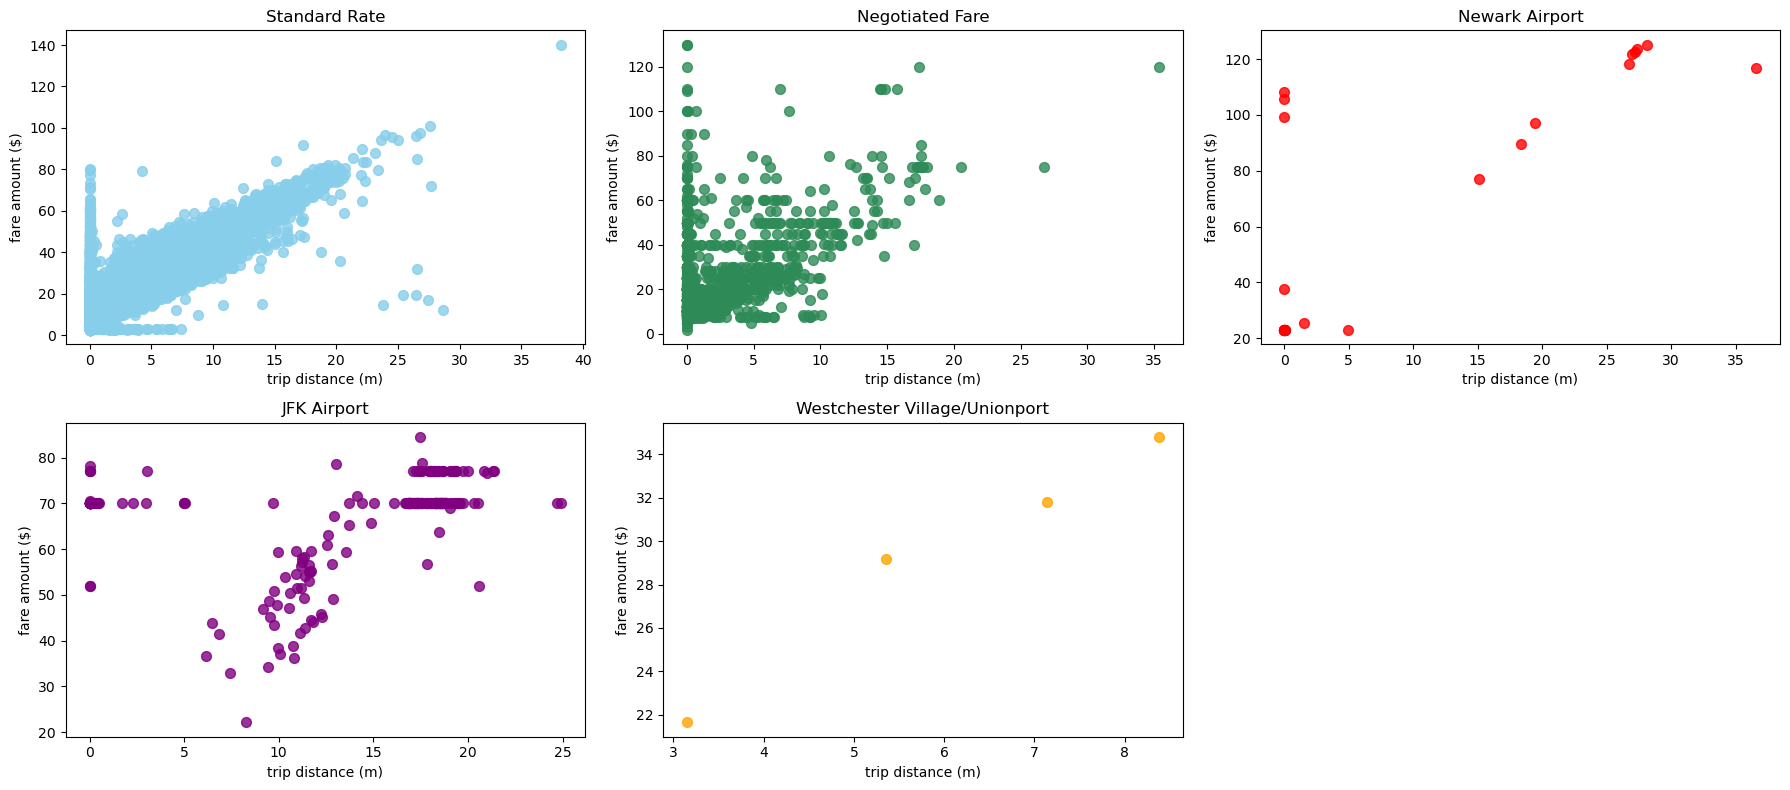

In [56]:
fig, ax = plt.subplots(2, 3, figsize=(18, 8))

conditions = [("RatecodeID == 'Standard rate'", 'skyblue'),
    ("RatecodeID == 'Negotiated fare'", 'seagreen'),
    ("RatecodeID == 'Newark Airport'", 'red'),
    ("RatecodeID == 'JFK Airport'", 'purple'),
    ("RatecodeID == 'Westchester Village/Unionport'", 'orange')]
titles = ['Standard Rate', 'Negotiated Fare', 'Newark Airport', 'JFK Airport','Westchester Village/Unionport']

for i, (condition, color) in enumerate(conditions):
    subplot = ax[i // 3, i % 3]
    data = df.query(condition)
    subplot.scatter(x=data['trip_distance'], y=data['fare_amount'], alpha=0.8, s=50, c=color)
    subplot.set_xlabel('trip distance (m)')
    subplot.set_ylabel('fare amount ($)')
    subplot.set_title(titles[i])

fig.delaxes(ax[1, 2])
plt.tight_layout()

plt.show()


**Insights**

- The correlation between `fare_amount` and `trip_distance` is relatively positive, mainly in the 'Standard rate, however the other rate have their own unique distribution.
- Despite that, there are a few data in the 'Standart rate' that are a little off from  the others

In [58]:
initial = df.copy()
df['fare_amount'] = np.where((df['trip_distance']>20) & (df['fare_amount']<35), np.nan, df['fare_amount'])
df['fare_amount'] = np.where((df['trip_distance']<10) & (df['fare_amount']<5), np.nan, df['fare_amount'])
df['fare_amount'] = np.where((df['trip_distance']<5) & (df['fare_amount']>40), np.nan, df['fare_amount'])

# dropping the NaN
df.dropna(subset='fare_amount', inplace=True)
print(f'''
      Initial data: {len(initial)}
      Processed data: {len(df)}
      Data dropped: {len(initial)-len(df)}''')


      Initial data: 64750
      Processed data: 64750
      Data dropped: 0


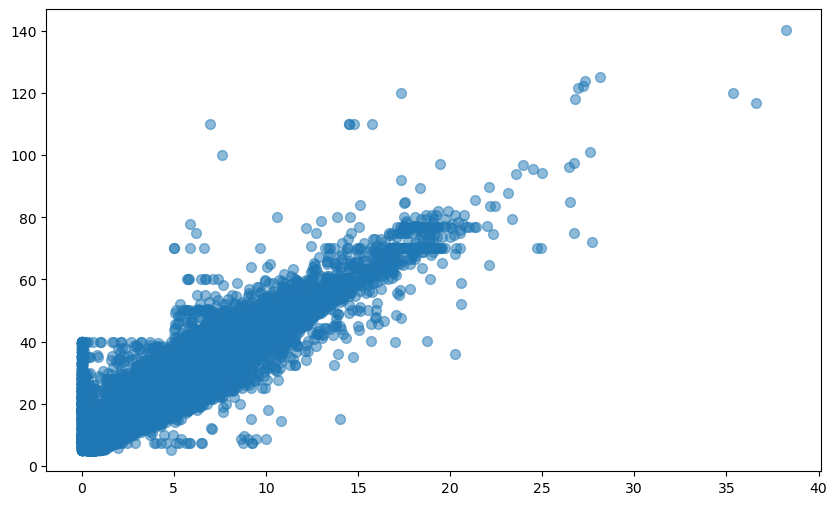

In [59]:
a = df[['fare_amount','trip_distance']]
# plt.scatter(y=df['fare_amount'],x=df['trip_distance'], scatter_kws={'alpha':0.5})

plt.figure(figsize=(10, 6))
plt.scatter(y=df['fare_amount'],x=df['trip_distance'], alpha=0.5, s=50)

### `tip_amount` :  
***
- If the tip amount is not reasonable (more than 100% the fare amount) it will be dropped, because it might alter the data conclusion

<Axes: xlabel='tip_amount'>

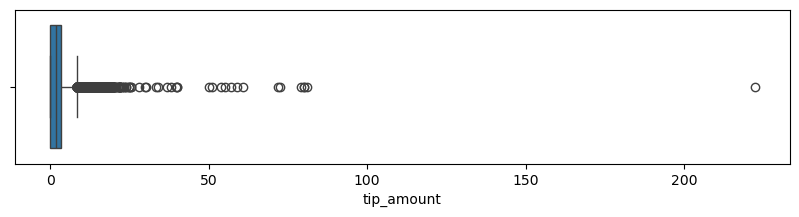

In [60]:
plt.figure(figsize=(10,2))
sns.boxplot(df['tip_amount'], orient='h')

In [61]:
df = df[df['tip_amount']<(df['fare_amount']*1)]

print(f'''
      Initial data: {len(initial)}
      Processed data: {len(df)}
      Data dropped: {len(initial)-len(df)}''')


      Initial data: 64750
      Processed data: 64692
      Data dropped: 58


<Axes: xlabel='tip_amount'>

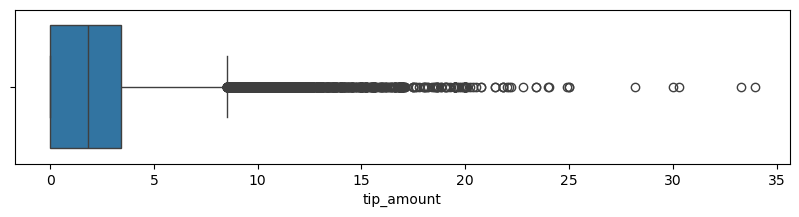

In [62]:
plt.figure(figsize=(10,2))
sns.boxplot(df['tip_amount'], orient='h')

### `total_amount`
***
- If the total amount is negative, then it will be assigned to it's absolute counterparts (positive), this might resulted because of earlier missing data (`fare_amount` or `trip_amount`)
- If the total of `fare_amount` + `tip_amount` is larger than `total_amount` it will be dropped.
- If the total amount in 0 then it will be dropped.

> The total amount of the longest trip distance is 160

<Axes: xlabel='total_amount'>

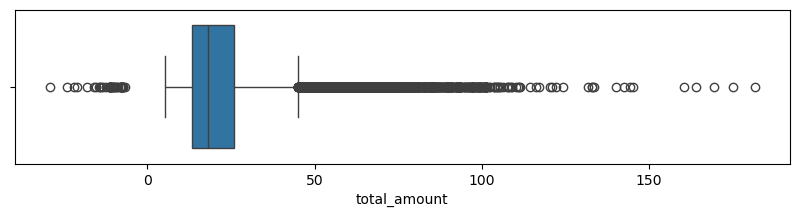

In [63]:
plt.figure(figsize=(10,2))
sns.boxplot(df['total_amount'], orient='h')

In [64]:
df['total_amount'] = np.where(df['total_amount']<0, df['total_amount']*-1, 
                              np.where(((df['total_amount']<(df['fare_amount']+df['tip_amount'])) | df['total_amount']==0), np.nan, df['total_amount']))
df.dropna(subset='total_amount',inplace=True)

print(f'''
      Initial data: {len(initial)}
      Processed data: {len(df)}
      Data dropped: {len(initial)-len(df)}''')


      Initial data: 64750
      Processed data: 64692
      Data dropped: 58


<Axes: xlabel='total_amount'>

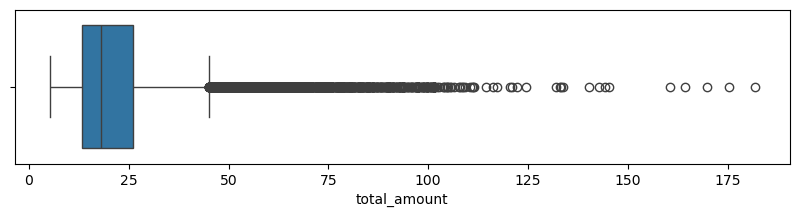

In [65]:
plt.figure(figsize=(10,2))
sns.boxplot(df['total_amount'], orient='h')

### `payment_type`
***
- Assigning the NaN values into 'unknown'
- The ones with the value 'No charge' are going to be dropped. Since it has no relenvant in the analysis.

In [66]:
df['payment_type'].unique()

array(['Credit card', 'Cash', 'No charge', 'Unknown', 'Dispute', nan],
      dtype=object)

In [67]:
initial = df.copy()
# filling the NaN with 'unknown' and dropping the No charge

df['payment_type'].fillna('unknown', inplace=True)
df.drop(df[df['payment_type']=='No charge'].index, inplace=True)


print(f'''
      Initial data: {len(initial)}
      Processed data: {len(df)}
      Data dropped: {len(initial)-len(df)}''')


      Initial data: 64692
      Processed data: 64534
      Data dropped: 158


In [68]:
df['payment_type'].unique()

array(['Credit card', 'Cash', 'Unknown', 'Dispute', 'unknown'],
      dtype=object)

### `trip_type`
***
- Assigning the NaN values into 'street hail' assuming that if the order was made via dispatch, it is more likely to be recorded.

In [69]:
df['trip_type'].unique()

array(['street hail', 'dispatch', nan], dtype=object)

In [70]:
df['trip_type'].fillna('street hail', inplace=True)

In [71]:
df['trip_type'].unique()

array(['street hail', 'dispatch'], dtype=object)

### `congestion_surcharge`
***
- The values will be assigned to a 'Y' and 'N' value.
- The NaN values will be assigned to 'N'

In [72]:
# filling the congestion_surcharge with 0
df['congestion_surcharge'].fillna(0)

# filling the data | if there are congestion charge, it will be filled with 'Y' and if not it will be filled with 'N' 
df['congestion_surcharge'] = np.where(df['congestion_surcharge']!=0, 1, df['congestion_surcharge'])
df.rename(columns={'congestion_surcharge': 'congestion'}, inplace=True)

In [73]:
df['congestion'].unique()

array([1., 0.])

### **Export Data**

In [77]:
df.head()
display(df.head(), df.shape)

,PUdate,DOdate,PUtime,DOtime,day,RatecodeID,PUzone,PUborough,DOzone,DOborough,duration_min,passenger_count,trip_distance,fare_amount,tip_amount,congestion,total_amount,payment_type,trip_type
0,2023-01-01,2023-01-01,00:26:10,00:37:11,Sunday,Standard rate,Morningside Heights,Manhattan,Lincoln Square West,Manhattan,11.02,1.0,2.58,14.9,4.03,1.0,24.18,Credit card,street hail
1,2023-01-01,2023-01-01,00:51:03,00:57:49,Sunday,Standard rate,Bloomingdale,Manhattan,Central Park,Manhattan,6.77,1.0,1.81,10.7,2.64,0.0,15.84,Credit card,street hail
2,2023-01-01,2023-01-01,00:35:12,00:41:32,Sunday,Standard rate,Steinway,Queens,Old Astoria,Queens,6.33,1.0,0.00,7.2,1.94,0.0,11.64,Credit card,street hail
3,2023-01-01,2023-01-01,00:13:14,00:19:03,Sunday,Standard rate,Central Harlem,Manhattan,Upper West Side North,Manhattan,5.82,1.0,1.30,6.5,1.70,0.0,10.20,Credit card,street hail
4,2023-01-01,2023-01-01,00:33:04,00:39:02,Sunday,Standard rate,Central Harlem,Manhattan,East Harlem North,Manhattan,5.97,1.0,1.10,6.0,0.00,0.0,8.00,Credit card,street hail


(64534, 19)

In [78]:
initialdata = trip.copy()
display(initialdata.head(), initialdata.shape)

,PUdate,DOdate,PUtime,DOtime,day,RatecodeID,PUzone,PUborough,DOzone,DOborough,duration_min,passenger_count,trip_distance,fare_amount,tip_amount,congestion_surcharge,total_amount,payment_type,trip_type
0,2023-01-01,2023-01-01,00:26:10,00:37:11,Sunday,Standard rate,Morningside Heights,Manhattan,Lincoln Square West,Manhattan,11.02,1.0,2.58,14.9,4.03,2.75,24.18,Credit card,street hail
1,2023-01-01,2023-01-01,00:51:03,00:57:49,Sunday,Standard rate,Bloomingdale,Manhattan,Central Park,Manhattan,6.77,1.0,1.81,10.7,2.64,0.00,15.84,Credit card,street hail
2,2023-01-01,2023-01-01,00:35:12,00:41:32,Sunday,Standard rate,Steinway,Queens,Old Astoria,Queens,6.33,1.0,0.00,7.2,1.94,0.00,11.64,Credit card,street hail
3,2023-01-01,2023-01-01,00:13:14,00:19:03,Sunday,Standard rate,Central Harlem,Manhattan,Upper West Side North,Manhattan,5.82,1.0,1.30,6.5,1.70,0.00,10.20,Credit card,street hail
4,2023-01-01,2023-01-01,00:33:04,00:39:02,Sunday,Standard rate,Central Harlem,Manhattan,East Harlem North,Manhattan,5.97,1.0,1.10,6.0,0.00,0.00,8.00,Credit card,street hail


(68211, 19)

In [79]:
Ndrop = (len(initialdata)-len(df))/len(df)*100
Ndrop = round(Ndrop, 2)

print(f'''
      Initial data (n={len(initialdata)})
      After Cleaning (n={len(df)})
      Data dropped: {len(initialdata)-len(df)} ({Ndrop} %)''')


      Initial data (n=68211)
      After Cleaning (n=64534)
      Data dropped: 3677 (5.7 %)


In [80]:
df.to_csv(r"trip_record_clean.csv", index = None, header=True)

# **Part IV. Data Analysis and Visualization**

text

---

In [83]:
df = pd.read_csv("trip_record_clean.csv")
df.head()

,PUdate,DOdate,PUtime,DOtime,day,RatecodeID,PUzone,PUborough,DOzone,DOborough,duration_min,passenger_count,trip_distance,fare_amount,tip_amount,congestion,total_amount,payment_type,trip_type
0,2023-01-01,2023-01-01,00:26:10,00:37:11,Sunday,Standard rate,Morningside Heights,Manhattan,Lincoln Square West,Manhattan,11.02,1.0,2.58,14.9,4.03,1.0,24.18,Credit card,street hail
1,2023-01-01,2023-01-01,00:51:03,00:57:49,Sunday,Standard rate,Bloomingdale,Manhattan,Central Park,Manhattan,6.77,1.0,1.81,10.7,2.64,0.0,15.84,Credit card,street hail
2,2023-01-01,2023-01-01,00:35:12,00:41:32,Sunday,Standard rate,Steinway,Queens,Old Astoria,Queens,6.33,1.0,0.00,7.2,1.94,0.0,11.64,Credit card,street hail
3,2023-01-01,2023-01-01,00:13:14,00:19:03,Sunday,Standard rate,Central Harlem,Manhattan,Upper West Side North,Manhattan,5.82,1.0,1.30,6.5,1.70,0.0,10.20,Credit card,street hail
4,2023-01-01,2023-01-01,00:33:04,00:39:02,Sunday,Standard rate,Central Harlem,Manhattan,East Harlem North,Manhattan,5.97,1.0,1.10,6.0,0.00,0.0,8.00,Credit card,street hail


- `PUdate`: The date on which the taxi trip was picked up.
- `DOdate`: The date on which the taxi trip was dropped off.
- `PUtime`: The time of day (hours) the taxi trip was picked up.
- `DOtime`: The time of day (hours) the taxi trip was dropped off.
- `day`: The day in which the taxi trip occurred.
- `RatecodeID`: The rate code or payment rate used for the taxi trip.
- `PUzone`: The specific pickup zone or location where the passenger was picked up.
- `PUborough`: The borough of NYC where the pickup occurred.
- `DOzone`: The specific dropoff zone or location where the passenger was dropped off.
- `DOborough`: The borough of NYC where the dropoff occurred.
- `duration_min`: The duration (minutes) of the taxi trip.
- `passenger_count`: The number of passengers in the taxi.
- `trip_distance`: The distance traveled (miles) during the taxi trip.
- `fare_amount`: The base fare amount charged for the taxi trip.
- `tip_amount`: The amount of tip or gratuity added to the fare by the passenger.
- `congestion`: Represent a measure of traffic congestion during the trip.
- `total_amount`: The total cost of the taxi trip, including the base fare, additional charges, and tips.
- `payment_type`: The method of payment used for the taxi trip (does not include cash tip)
- `trip_type`: A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.

In [84]:
# reformatting these columns to datetime format
df = df.astype({
    'PUtime': 'datetime64[s]',
    'PUdate': 'datetime64[s]',
    'DOtime': 'datetime64[s]',
    'DOdate': 'datetime64[s]'})

# making new supporting columns for analysis
df['weekday/end'] = np.where(df['day'].isin(['Saturday','Sunday']),'Weekend','Weekday')
df['hour'] = df['PUtime'].dt.hour
df['other_fare'] = df['total_amount'] - (df['tip_amount'] + df['fare_amount'])
df['tip%'] = (df['tip_amount'] / df['total_amount']) * 100 # tip % to total amount"

- `hour`: the hour of the day.
- `weekday/end`: Whether the trip was done in Weekday or Weekend.
- `other_fare`: The extra cost of taxi trips that are charged (tax, toll  and extra charges)
- `tip%`: Tip amount ratio to total amount

In [85]:
# sorting list for categorical datas
boroughsFull = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx','Staten Island', 'EWR']
df['DOborough'] = pd.Categorical(df['DOborough'], categories=boroughsFull, ordered=True)
df['PUborough'] = pd.Categorical(df['PUborough'], categories=boroughsFull, ordered=True)
boroughs = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx']
viridis = plt.cm.viridis(np.linspace(0, 1, 6))
lengthsorted = ['Very Short','Short','Medium','Long','Very Long'] 
classsorted = ['Cash','No tip','Modest','Moderate','Generous','Very Generous']
daysorted = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

### **Mapping**

In [ ]:
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
boroughsloc = {
    'Manhattan': {'location': [40.7831, -73.9712]},
    'Brooklyn': {'location': [40.6782, -73.9442]},
    'Queens': {'location': [40.7282, -73.7949]},
    'The Bronx': {'location': [40.8448, -73.8648]},
    'Staten Island': {'location': [40.5795, -74.1502]}
}

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i, (borough, data) in enumerate(boroughsloc.items()):
    folium.Marker(
        location=data['location'],
        popup=borough,
        icon=folium.Icon(color=colors[i])
    ).add_to(nyc_map)

nyc_map

### **Proportions**

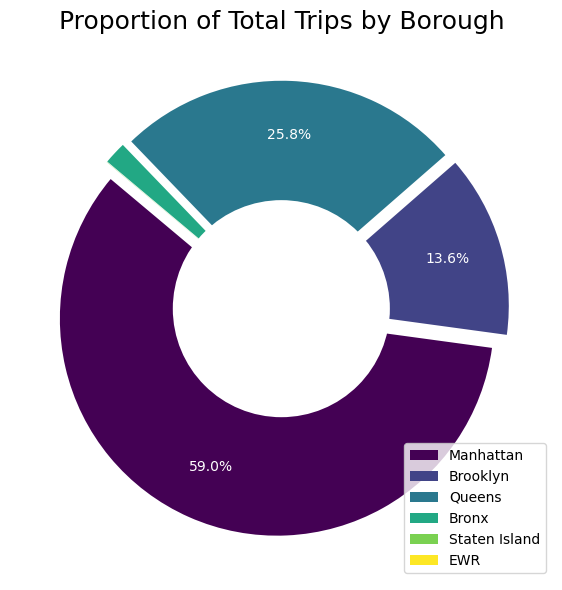

In [86]:
# grouping trips by borough
tripsbyborough = pd.DataFrame(df.groupby(by=['PUborough', 'DOborough'])['PUdate'].count().reset_index())
tripsbyborough = tripsbyborough.rename(columns={'PUdate': 'total trips'})
tripsbyborough = tripsbyborough.groupby(by='PUborough')['total trips'].sum().to_frame()
total_trips = tripsbyborough['total trips']


# filtering the autopct, so that only the top 3 value are shown
largest_indices = sorted(range(len(total_trips)), key=lambda i: total_trips[i], reverse=True)[:3]
autopct_labels = ['%1.1f%%' % (val / sum(total_trips) * 100) if i in largest_indices else '' for i, val in enumerate(total_trips)]

# creating a pie chart
plt.figure(figsize=(6, 6))
plt.pie(tripsbyborough['total trips'], 
autopct=lambda x: autopct_labels.pop(0), 
# autopct='%1.2f%%',
startangle=140, pctdistance=0.75, textprops={'color': 'white'}, 
colors=viridis, explode=[0.05]*len(tripsbyborough))
plt.title('Proportion of Total Trips by Borough', fontsize=18)

# adding center circle
fig = plt.gcf()
centre_circle = plt.Circle((0,0), 0.5, fc='white')
fig.gca().add_artist(centre_circle)
plt.tight_layout()

plt.legend(labels=tripsbyborough.index, loc='lower right')
plt.show()

**From this graphic we can conclude:**
- Taxi trips in NYC are not very well distributed in every boroughs.
- More than half of the taxi trips recorded are from Manhattan (59%).
- These proportions are followed by Queens (25.8%) and Brooklyn (13.6%) with a significant decrease.
- Staten Island and Bronx does not contribute much taxi trips in NYC.

### **Distribution**


**Analyzing NYC Fare Revenue Distribution**, this will show how much each borough contributes to the total fare revenue of taxi trips in their areas.

In [88]:
# Grouping fare amount by Borough
farebyborough = pd.DataFrame(df.groupby(by=['PUborough', 'DOborough'])['fare_amount'].sum())
farebyborough = farebyborough.rename(columns={'fare_amount': 'fare value'})

farebyboroughAll =  farebyborough.groupby(by='PUborough')['fare value'].sum().to_frame().reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

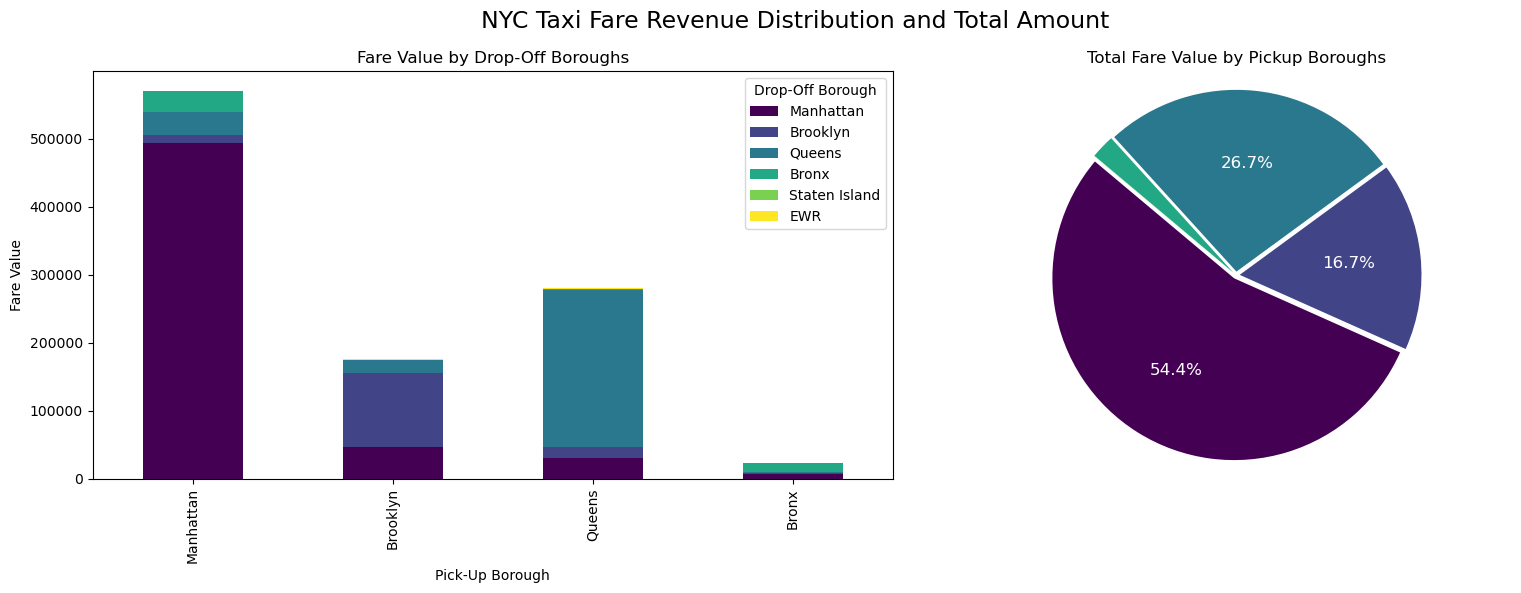

In [89]:
# making a  subplots of NYC fare datas
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1.5, 1]})
plt.suptitle('NYC Taxi Fare Revenue Distribution and Total Amount',size=17)

fare_value = farebyboroughAll['fare value']
PUborough = farebyboroughAll['PUborough']

# 
largest = sorted(range(len(fare_value)), key=lambda i: fare_value[i], reverse=True)[:3]
autopct= ['%1.1f%%' % (val / sum(fare_value) * 100) if i in largest else '' for i, val in enumerate(fare_value)]
explode = [0.02] * len(farebyboroughAll)

# pie chart to show the distribution
axes[1].pie(fare_value, labels=PUborough, autopct=lambda x: autopct.pop(0), startangle=140, colors=viridis, explode=explode,  textprops={'color': 'white', 'fontsize': 12})
axes[1].axis('equal')
axes[1].set_title('Total Fare Value by Pickup Boroughs')

# farebyborough = farebyborough[farebyborough.index != 'EWR']
pivoted = farebyborough.pivot_table(index='PUborough', columns='DOborough', values='fare value', aggfunc='sum', fill_value=0)
pivoted.drop(index=['EWR','Staten Island'], inplace=True) # dropping EWR and Staten Island because the value proportion are too low to visualize
# stacked bar chart show the fare proportion from each destination borough 
pivoted.plot(kind='bar', stacked=True, ax=axes[0], color=viridis)

# Customize the chart
axes[0].set_xlabel('Pick-Up Borough')
axes[0].set_ylabel('Fare Value')
axes[0].set_title('Fare Value by Drop-Off Boroughs')
axes[0].legend(title='Drop-Off Borough')

plt.tight_layout()
plt.show


**From this graphic we can conclude:**
- Linear to the total trips, Manhattan still holds the most contribution to the fare revenue generated by this taxi trips.
- Brooklyn's proportion towards the fare revenue increases from the total trips.
- Most of these trips are done intra-district, meaning that the trips are more likely to occur inside the same borough.
- Brooklyn has a larger contribution of inter-district travels, mainly towards Manhattan.
- Manhattan has the most significance in terms of being a inter-city trips destinations.

### **Ratio**


**Pickup to Dropoff Ratio**, this ratio will show for each borough, how many people are going in and out using taxis.

<Figure size 500x500 with 0 Axes>

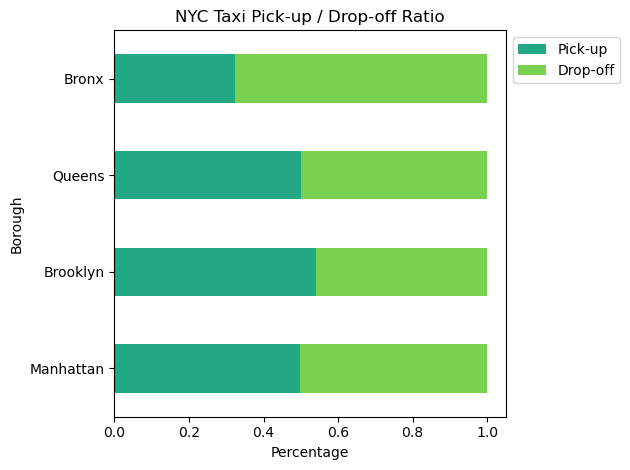

In [90]:
# Making a table of DO / PU ratio
PUtoDO = pd.DataFrame(df.groupby(by=['PUborough'])['PUdate'].count().reset_index())
PUtoDO = PUtoDO.rename(columns={'PUborough':'borough','PUdate': 'total PU'})
DOtoPU = pd.DataFrame(df.groupby(by=['DOborough'])['DOdate'].count().reset_index())
DOtoPU = DOtoPU.rename(columns={'DOborough':'borough','DOdate': 'total DO'})

PUtoDO = PUtoDO.merge(DOtoPU, on='borough', how='outer')
PUtoDO['Pick-up'] = PUtoDO['total PU'] / (PUtoDO['total PU'] + PUtoDO['total DO'])
PUtoDO['Drop-off'] = PUtoDO['total DO'] / (PUtoDO['total PU'] + PUtoDO['total DO'])
PUtoDO = PUtoDO[~PUtoDO['borough'].isin(['EWR', 'Staten Island'])] # dropping Staten Island and EWR since it doesnt have much significance
PUtoDO.set_index('borough', inplace=True)

# Pickup / Drop off Ratio
plt.figure(figsize=(5,5))
bar2 = PUtoDO[['Pick-up', 'Drop-off']].plot(kind='barh', stacked=True, color=viridis[3:5])
bar2.set_title('NYC Taxi Pick-up / Drop-off Ratio')
bar2.set_xlabel('Percentage')
bar2.set_ylabel('Borough')
bar2.legend(title='', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

**From this graphic we can conclude:**
- The only borough that have more dropoff ratio are Bronx, this indicates that most people from Bronx are not using the taxi services yet, but people who wants to go to Bronx does.

**Classifying each borough trip length**, 

we are going to classify the trip distance into a few categories:

| Trip Distance | Trip Length |
|-------------|-------------|
| 0.5-1 miles          | Very Short |
| 1-2 miles          | Short      |
| 2-3 miles          | Medium     |
| 3-5 miles          | Long       |
| > 5 miles          | Very Long  |

This will help us understand the culture and pattern of trip distance in each borough.

<Figure size 600x600 with 0 Axes>

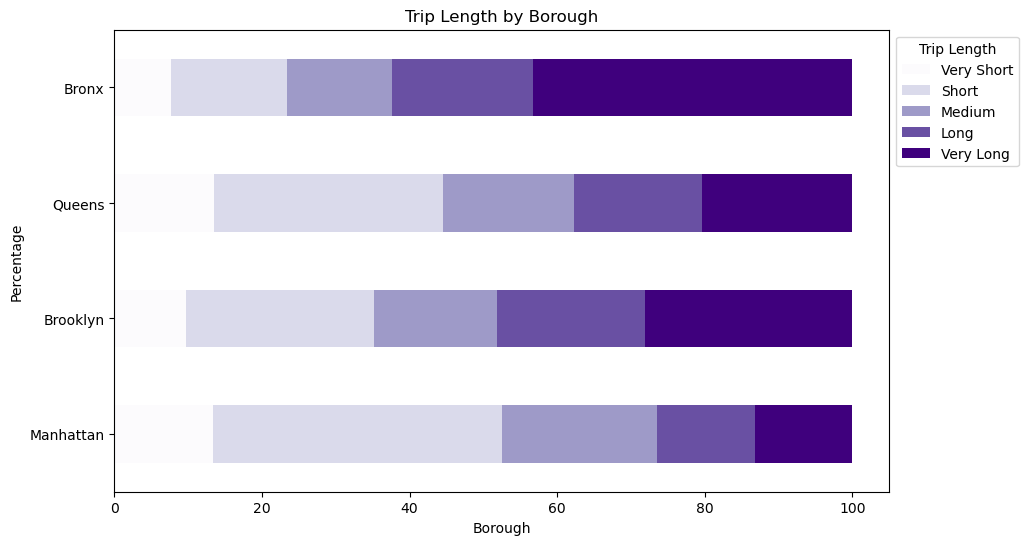

<Figure size 640x480 with 0 Axes>

In [91]:
# mapping the trip length
df['trip_length'] = np.where((df['trip_distance'] >= 0.5) & (df['trip_distance'] < 1), 'Very Short',
                              np.where((df['trip_distance'] >= 1) & (df['trip_distance'] < 2), 'Short',
                              np.where((df['trip_distance'] >= 2) & (df['trip_distance'] < 3), 'Medium',
                              np.where((df['trip_distance'] >= 3) & (df['trip_distance'] < 5), 'Long', 'Very Long'))))
df['trip_length'] = pd.Categorical(df['trip_length'], categories=lengthsorted, ordered=True)

# making a stacked bar for trip length
borlength = df.groupby(by=['trip_length','PUborough'])['PUtime'].count().to_frame().reset_index()
borlength = borlength[~borlength['PUborough'].isin(['EWR', 'Staten Island'])]
pivoted = borlength.pivot(index='PUborough', columns='trip_length', values='PUtime').fillna(0)

percentage = pivoted.div(pivoted.sum(axis=1), axis=0) * 100

plt.figure(figsize=(6,6))
ax = percentage.plot(kind='barh', stacked=True, figsize=(10, 6), width=0.5, colormap='Purples')

ax.set_title('Trip Length by Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Percentage')
plt.legend(title='Trip Length', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

plt.tight_layout()
plt.show()

**From this graphic we can conclude:**
- Each borough have a different patterns of trip length.
- The taxis in Manhattan rarely took long distance trips compared to those shorter trips.
- Bronx has the most proportion of Very Long trip.

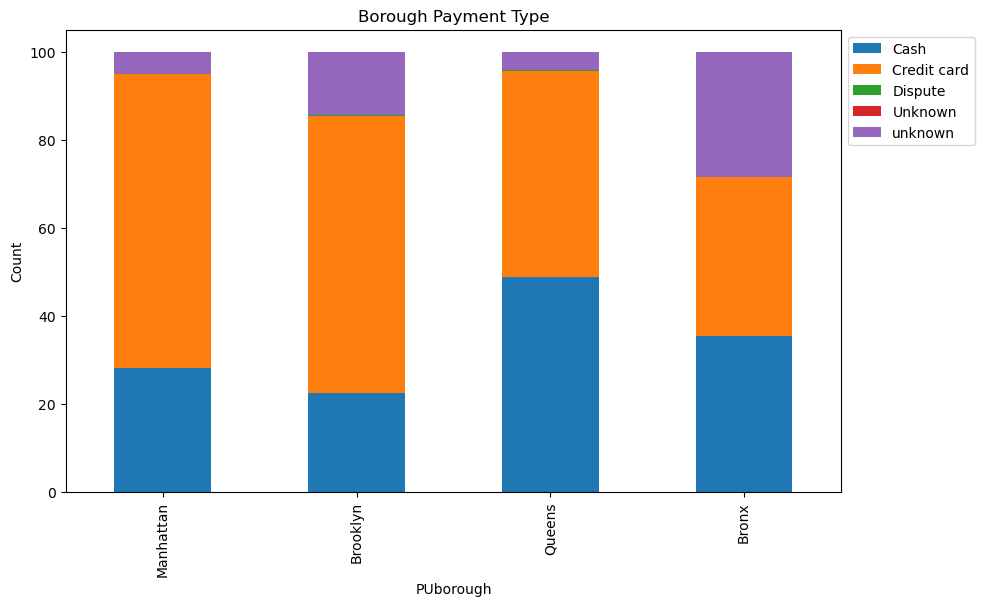

In [92]:
boroughpayment =df.groupby(['payment_type','PUborough'])['PUdate'].count().to_frame().reset_index()
boroughpayment = boroughpayment[~boroughpayment['PUborough'].isin(['EWR','Staten Island'])] 
pivot_data = boroughpayment.pivot_table(index='PUborough', columns='payment_type', values='PUdate', fill_value=0)
percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(10, 6))
percentage.plot(kind='bar', stacked=True, ax=ax, alpha=1)

ax.set_xlabel('PUborough')
ax.set_ylabel('Count')
ax.set_title('Borough Payment Type')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


**From this graphic we can conclude:**
- Most of the payments in **Manhattan** and **Brooklyn** are done with Credit Card, this shows that the people using the taxi are people who are more financially secured.
- In **Queens** and **Bronx** Cash are still the preferable option to pay. 

**Insights**

- Although NYC is a very big city, the culture or using taxis as a daily public transportation still centered towards **Manhattan**, that consist mainly of short to medium trips inside the district that distances in less that 3 miles and rarely gets on a long trip, so currently Manhattan is TLC's biggest consumer. 
- Most of the trips are done inside the district

- **Brooklyn** does have a higher average of percentage of fare contribution, meaning that even though the trips occurs way less frequent, but each of the trips are more valuable financially. This opens up many opportunities for new markets.

- Many inter-district trip are destinating towards Manhattan.

- **Staten Island** is culturally very distant from the other districts.

- Looking at the dropoff ratio, **Bronx** show that they have the needs for public transportation, it's just that the current taxi cab is not their first choice for pickup points. 

- **Staten Island** and **Bronx** are not a daily consumer of NYC's taxi services. It is an option to research further their market to see if thay are a liable options for expansions.

- Most people in **Manhattan** have already use Credit Cards as the preferable options of payments, showing their strength in financial security. This habit can be analyzed deeper to understand how to improve and innovate the financial system of the taxis.

### **Time Series**

**Daily trip distribution**, to understand the pattern of NYC taxis' busiest schedule we can make a plot distribution of each hours.

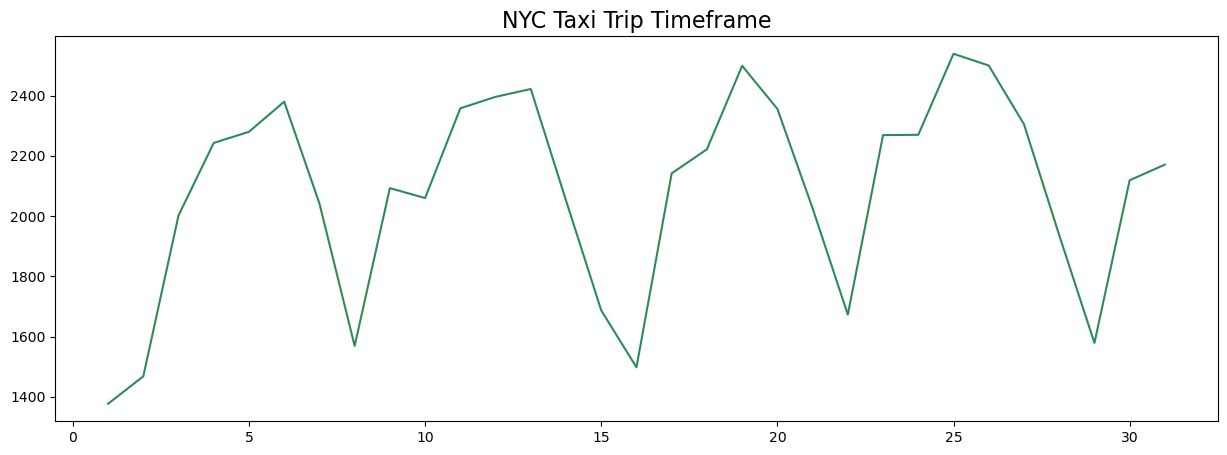

In [93]:
# making a plot of nyc taxi trips
trips = df.groupby(['PUdate','day']).count().reset_index()
trips['PUdate'] = trips['PUdate'].dt.day

plt.figure(figsize=(15,5))

plt.title('NYC Taxi Trip Timeframe', size=16)
plt.plot(trips['PUdate'],trips['PUtime'],markersize=40, color='seagreen')

plt.show()

**Hourly trip distribution per borough**, an hourly countplot of each boroughs to understand the trip pattern in hourly intervals.

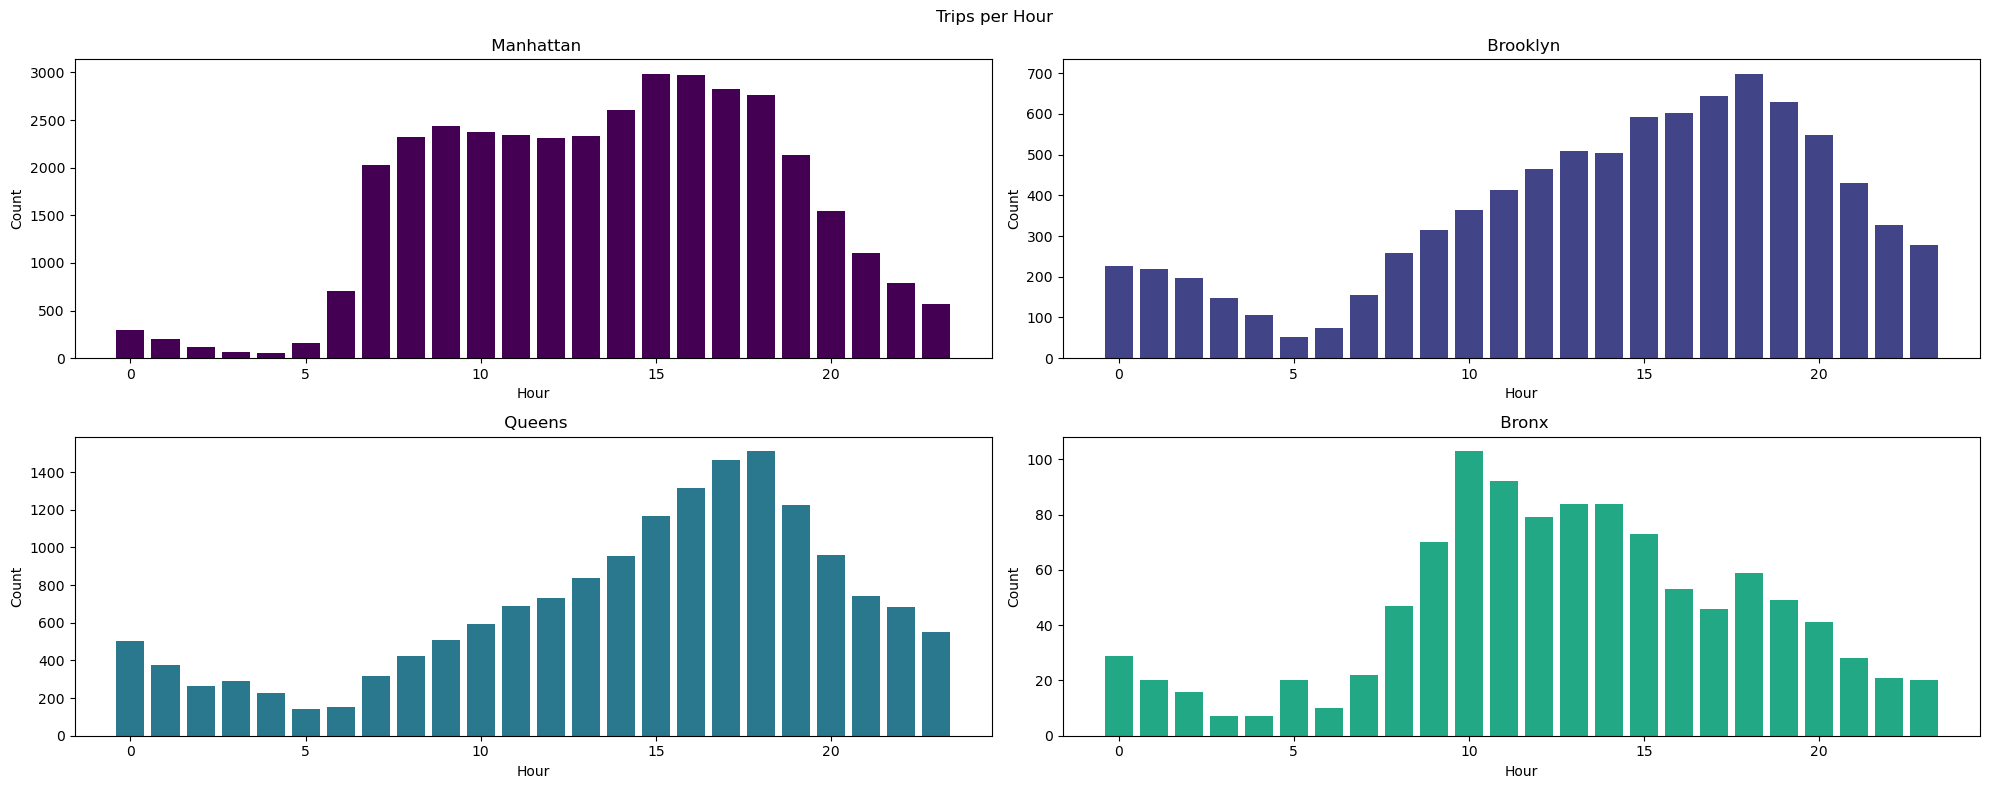

In [94]:

# making a countplot of trips in each hour of each borough
fig, axes = plt.subplots(2, 2, figsize=(20, 8))
plt.suptitle('Trips per Hour')

for i, borough in enumerate(boroughs):
    ax = axes[i // 2, i % 2]
    data_borough = df[df['PUborough'] == borough]
    
    # Count the number of trips per hour in this borough
    hour_counts = data_borough['hour'].value_counts().sort_index()
    hours = hour_counts.index
    counts = hour_counts.values

    # Create a bar plot using plt.bar
    ax.bar(hours, counts, color=viridis[i])
    ax.set_title(f' {borough}')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Count')

# Adjust the layout and display the subplots
plt.tight_layout()
plt.show()

**From this graphic we can conclude:**
- In terms of trip counts NYC's borough have various distribution.
 
- **Manhattan** has the busiest trip distribution throughout the day, ranging a high volume within 8AM to 8PM (workhour) making it the busiest borough of all.
- **Brooklyn** and **Queens** has a closely similar distribution, the busy hours are between 3PM to 8PM which is after work hours.
- **Bronx**'s distribution are quite different from the other, ranging a high volume at 10AM to 3PM.


**Congestion distribution**, to understand the pattern of NYC taxis' busiest schedule we can make a countplot distribution of each hours.

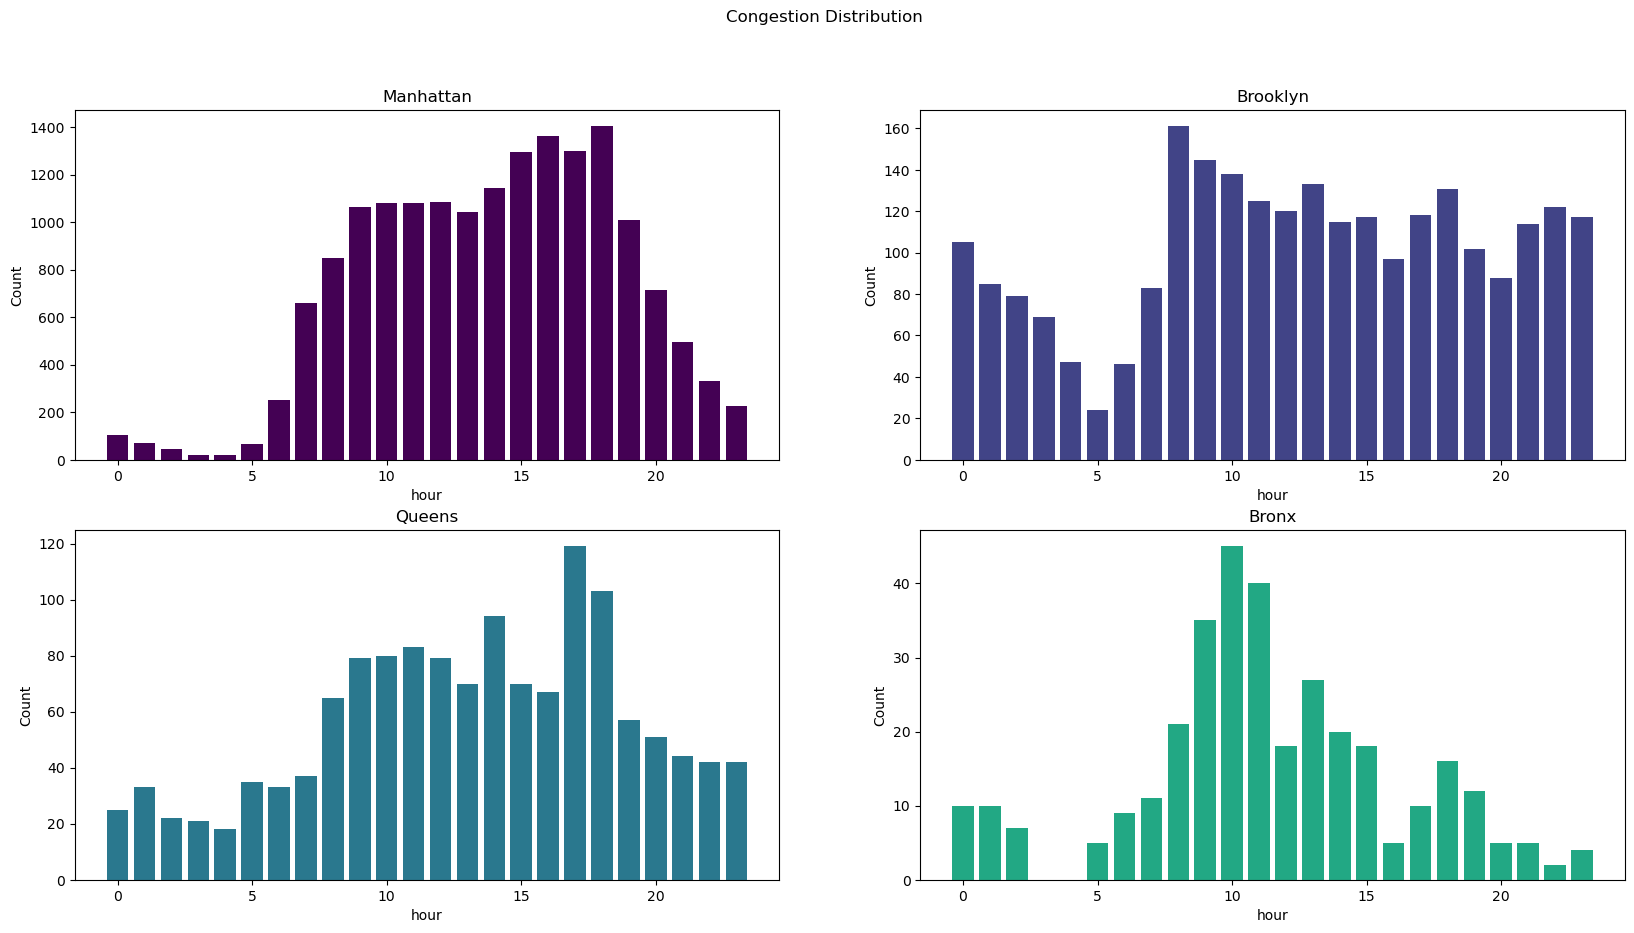

In [95]:
# making a countplot of congestion in each hour of each borough
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
plt.suptitle('Congestion Distribution')

for i, borough in enumerate(boroughs):
    ax = axes[i // 2, i % 2]
    data_borough = df[df['PUborough'] == borough]

    congestionsum = data_borough.groupby('hour')['congestion'].sum()
    hours = congestionsum.index
    counts = congestionsum.values

    ax.bar(hours, counts, color=viridis[i])
    ax.set_title(f'{borough}')
    ax.set_xlabel('hour')
    ax.set_ylabel('Count')

plt.show()

**From this graphic we can conclude:**
- Manhattan and Bronx has similar distribution of trips and congestions.

- Brooklyn and Queens's congestion distribution differs from the trips, particularly in the morning to noon. This might indicates that there are a correlation between congestion condition and their demand of trips.

### **Trips District**

In [96]:
inter = df[['PUdate','PUborough','DOborough','day','hour','weekday/end']]
inter['inter/intra'] = np.where(df['PUborough']==df['DOborough'],'Intra','Inter')
inter = inter.groupby(by=['inter/intra','weekday/end','hour'])['PUdate'].count().to_frame().reset_index()
inter.rename(columns={'PUdate':'trip'}, inplace=True)
inter_weekday = inter[(inter['weekday/end'] == 'Weekday') & (inter['inter/intra'] == 'Inter')].set_index('hour')
inter_weekend = inter[(inter['weekday/end'] == 'Weekend') & (inter['inter/intra'] == 'Inter')].set_index('hour')
intra_weekday = inter[(inter['weekday/end'] == 'Weekday') & (inter['inter/intra'] == 'Intra')].set_index('hour')
intra_weekend = inter[(inter['weekday/end'] == 'Weekend') & (inter['inter/intra'] == 'Intra')].set_index('hour')

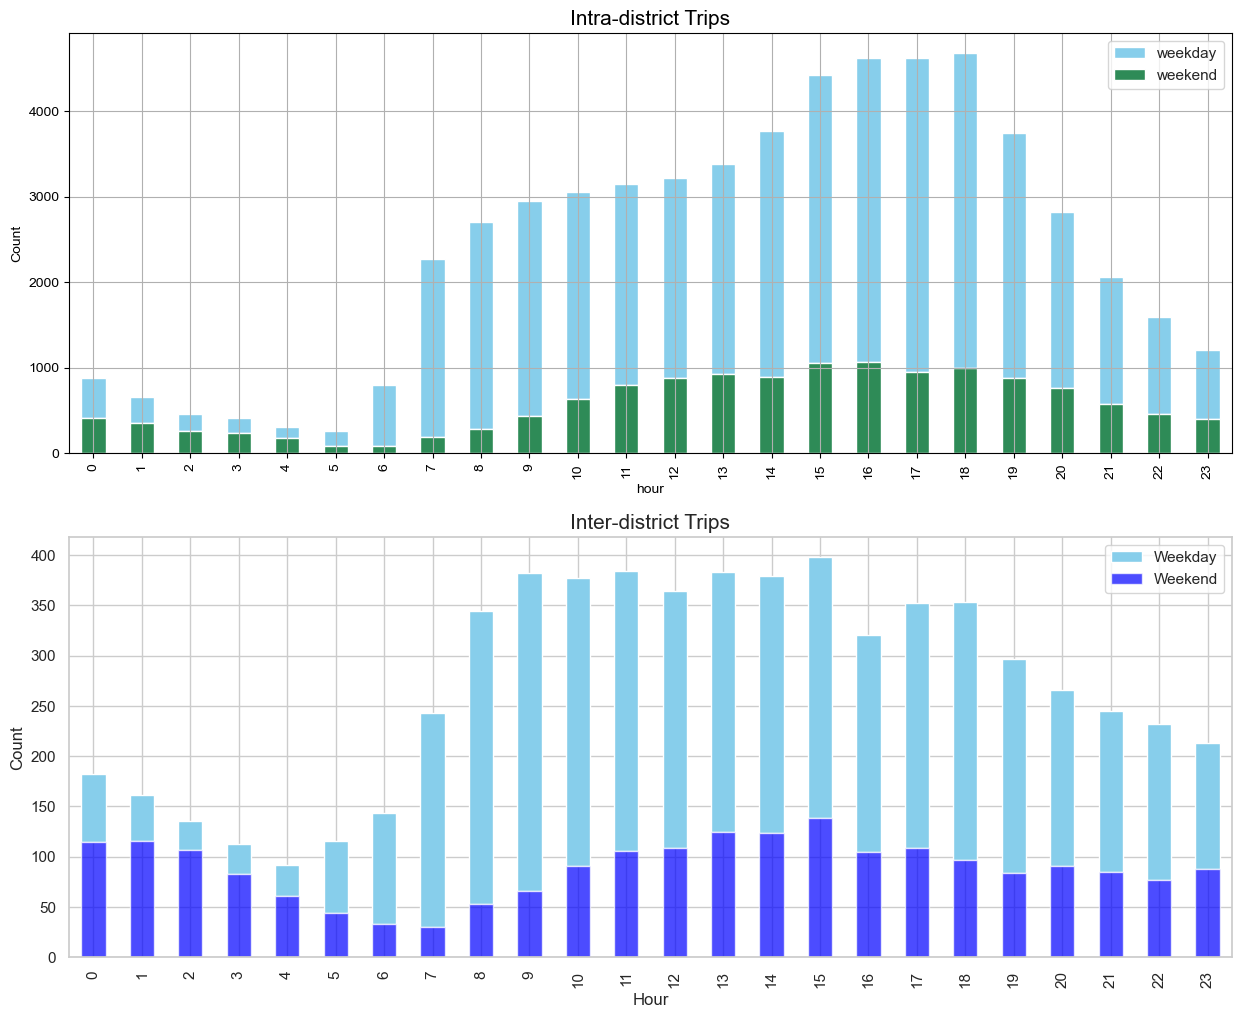

In [97]:
# makign a count plot of intra and inter district trips
plt.figure(figsize=(15, 12))
plt.subplot(2,1,1)
sns.set(style="whitegrid")

intra_weekday['trip'].plot(kind='bar',color='skyblue',label='weekday',alpha=1,bottom=intra_weekend['trip'])
intra_weekend['trip'].plot(kind='bar', color='seagreen',label='weekend',alpha=1)
plt.ylabel('Count')
plt.title('Intra-district Trips',size=15)
plt.legend()

plt.subplot(2,1,2)
sns.set(style="whitegrid")

inter_weekday['trip'].plot(kind='bar', color='skyblue',label='Weekday',alpha=1,bottom=inter_weekend['trip'])
inter_weekend['trip'].plot(kind='bar',color='blue',label='Weekend',alpha=0.7)

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Inter-district Trips',size=15)
plt.legend()
plt.show()


**From this graphic we can conclude:**
- Most of the trips in NYC are happening inside the district.

- Inter-district tips has a higher proportion in the weekends.
- Inter-district trips that occur before 4AM are likely to happen in the weekend

### **Comparison**

In [100]:
area = df.groupby(by=['PUborough','hour'])[['fare_amount','other_fare','tip_amount','total_amount']].sum().reset_index()
for i, borough in enumerate(boroughs):
    fig = px.area(area[area['PUborough']==borough], x='hour', y=['fare_amount','other_fare', 'tip_amount'],
    width=1000, height=300)
    fig.show()

### **Heatmap**

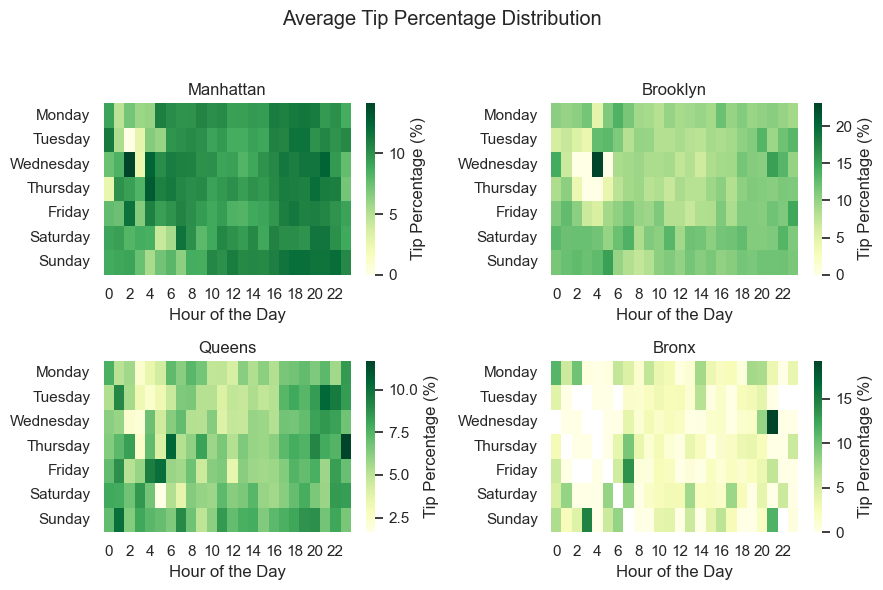

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(9, 6))
plt.suptitle('Average Tip Percentage Distribution')
# making the heatmap of tips percentage
for i, borough in enumerate(boroughs):
    row, col = divmod(i, 2) 
    ax = axes[row, col]
    
    heatmap_data = df[df['PUborough'] == borough].pivot_table(index='day', columns=df['PUtime'].dt.hour, values='tip%', aggfunc='mean').reset_index()
    
    heatmap_data['day'] = pd.Categorical(heatmap_data['day'], categories=daysorted, ordered=True)
    heatmap_data = heatmap_data.sort_values('day')
    heatmap_data = heatmap_data.set_index('day')
    heatmap_data = heatmap_data.sort_index()
    
    sns.heatmap(heatmap_data, cmap='YlGn', cbar_kws={'label': 'Tip Percentage (%)'}, ax=ax)
    ax.set_title(f'{borough}')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('')
    ax.grid(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**From these graphic we can conclude:**
- **Manhattan** is the borough with the most consistency in terms of tipping. In the weekdays the tipping value have a denser volume at the work hour, while at the weekend it is denser in the afternoon all the way to midnight.
- **Brooklyn, Queens** and **Bronx**'s tipping distribution are less consistence. Centering in a few time of the hours only without precise pattern.

### **Tip Amount**

**Classifying the tipping amount**,


we are going to classify the tip amoung into a few categories:


| Tip Class        | Tip (% of total amount)|
|------------------|--------------|
| Cash | 0 (with cash as payments)
| No tip           | 0          |
| Modest           | 0% - 10%         |
| Moderate         | 10% - 15%       |
| Generous         | 15% -20%       |
| Very Generous    | > 20%        |

This will help us understand the culture and pattern of tipping amount in each borough.


In [102]:
# making a new column consisting of the classified trip class
df['tip_class'] = np.where(df['tip%'] >= 20, 'Very Generous',
            np.where(df['tip%'] >= 15, 'Generous',
            np.where(df['tip%'] >= 10, 'Moderate',
            np.where(df['tip%'] > 0, 'Modest',
            np.where(df['payment_type'].isin(['Cash']),'Cash',
            'No tip')))))
df['tip_class'] = pd.Categorical(df['tip_class'], categories=classsorted, ordered=True)

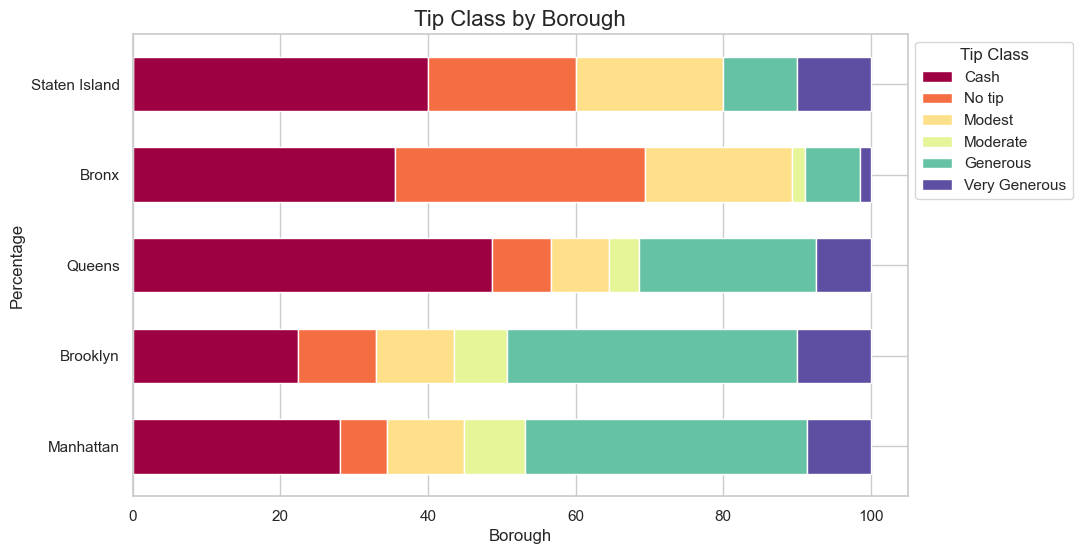

In [103]:
# making a stacked barplot consisting of the tip class by borough
tipclass = df.groupby(['PUborough','tip_class'])['PUtime'].count().reset_index()
pivot_tip = tipclass.pivot(index='PUborough', columns='tip_class', values='PUtime').fillna(0)

pivot_tip_percentage = pivot_tip.div(pivot_tip.sum(axis=1), axis=0) * 100
pivot_tip_percentage.dropna(inplace=True)

ax = pivot_tip_percentage.plot(kind='barh', stacked=True, figsize=(10, 6), width=0.6, colormap='Spectral')

ax.set_title('Tip Class by Borough', size=16)
ax.set_xlabel('Borough')
ax.set_ylabel('Percentage')
plt.legend(title='Tip Class', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**From this graphic we can conclude:**
- More people in **Manhattan** and **Brooklyn** are giving a generous amount of trip, indirectly describing their benevolence in their financial ability.

- In borough like **Queens** and **Bronx** there are less people that gives very generous amount of tips, but with their huge proportion of cash payments this might be affected the recording of the tips.

**Insights:**
- The taxi passengers in Manhattan are more generous towards tipping, meaning that the people are more willing to pay extra cash for a service.

- The tip amount is heavily relative to the fare and total amount that needed to be paid.

### **Working Time**

In [104]:
# making a aggregated table of the top 5 DOzone
offtowork = df[df['hour'].isin([7,8,9,10])]
offtowork = offtowork[offtowork['weekday/end']=='Weekday'] # eliminating weekends data
offtowork = offtowork[['DOzone','hour','PUdate']]
offtowork = offtowork.groupby(['DOzone'])['PUdate'].count().to_frame().sort_values(by='PUdate',ascending=False).head(5)
offtowork.rename(columns={'PUdate':'Trips on AVG'}, inplace=True)
offtowork['Trips on AVG'] = (offtowork['Trips on AVG'] / 23).round() # averaging per day - minus weekends 31 - (2*4) 
offtowork

,Trips on AVG
DOzone,
East Harlem South,48.0
East Harlem North,27.0
Morningside Heights,26.0
Upper East Side North,26.0
Central Harlem,22.0


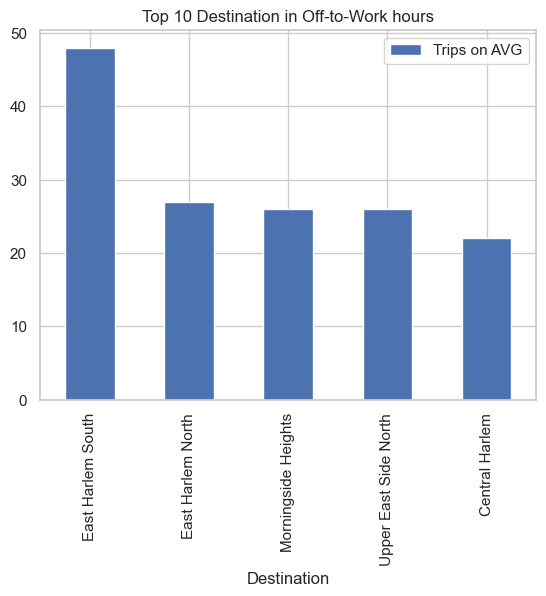

In [105]:
offtowork.plot(kind='bar')
plt.title('Top 10 Destination in Off-to-Work hours')
plt.xlabel('Destination')
plt.show()

**Insight**
- The top 5 destination zone in the off-to-works hours on average have 26-56 peple going to the same destination, meaning that this might be a communal or cultural trend to use taxi to these area. This indicates that NYC taxis are a preferable option of going to work transportations.

### **Trip Type**

In [106]:
trip_type = df[['trip_type']].groupby('trip_type').size().reset_index(name='count')
trip_type

,trip_type,count
0,dispatch,981
1,street hail,63553


In [107]:

fig = go.Figure()


fig.add_trace(go.Pie(labels = ['Street-Hail','Dispatch','Unknown'], 
                     values = trip_type["count"], 
                     name  = "Trip Type",
                     marker= {'colors': ["Green","YellowGreen","LightGreen"]}),
              )


fig.update_traces(hole=0.7, hoverinfo="label+percent+name")


fig.update_layout(
    title_text="Transaction by Trip Type",
    showlegend=False,
    annotations=[dict(text="Total Transaction", x=0.17+0.33, y=0.65, font_size=15, showarrow=False),
                 dict(text=str(trip_type["count"].sum()), x=0.190+0.31, y=0.55, font_size=40, showarrow=False),
                 dict(text="Dispatch", x=0.520, y=0.425, font_size=15, showarrow=False),
                 dict(text="Street-Hail", x=0.531, y=0.29, font_size=15, showarrow=False),
                 dict(text="Unknown", x=0.522, y=0.185, font_size=15, showarrow=False),
                ])


fig.add_shape(type="rect",
    x0=0.1+0.35,
    y0=0.40, 
    x1=0.2+0.27, 
    y1=0.45,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="YellowGreen",
)

fig.add_shape(type="rect",
    x0=0.1+0.35, 
    y0=0.30, 
    x1=0.2+0.27, 
    y1=0.35,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="Green",
)

fig.add_shape(type="rect",
    x0=0.1+0.35, 
    y0=0.20, 
    x1=0.2+0.27, 
    y1=0.25,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="LightGreen",
)

# Show the result
fig.show()

### **Payment Type**

In [108]:
payment_counts = df[['payment_type']]
# selain credit card dan cash, karena jumlahnya sedikit bisa digabungkan saja menjadi 'Other'
payment_counts['payment_type'] = payment_counts['payment_type'].replace({4:3,5:3,6:3})

In [109]:
payment_ = payment_counts.groupby('payment_type').size().reset_index(name='count')
payment_

,payment_type,count
0,Cash,21124
1,Credit card,39187
2,Dispute,26
3,Unknown,1
4,unknown,4196


In [113]:

fig = go.Figure()


fig.add_trace(go.Pie(labels = ['Credit Card','Cash','Other'], 
                     values = payment_["count"], 
                     name  = "Payment Type",
                     marker= {'colors': ["Green","YellowGreen","LightGreen"]}),
              )
fig.update_traces(hole=0.7, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Transaction by Payment Type",
    showlegend=False,
    annotations=[dict(text="Total Transaction", x=0.17+0.33, y=0.65, font_size=15, showarrow=False),
                 dict(text=str(payment_["count"].sum()), x=0.190+0.31, y=0.55, font_size=40, showarrow=False),
                 dict(text="Cash", x=0.501, y=0.425, font_size=15, showarrow=False),
                 dict(text="Credit Card", x=0.533, y=0.29, font_size=15, showarrow=False),
                 dict(text="Other", x=0.503, y=0.185, font_size=15, showarrow=False),
                ])

fig.add_shape(type="rect",
    x0=0.1+0.35,
    y0=0.40, 
    x1=0.2+0.27, 
    y1=0.45,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="YellowGreen",
)

fig.add_shape(type="rect",
    x0=0.1+0.35, 
    y0=0.30, 
    x1=0.2+0.27, 
    y1=0.35,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="Green",
)

fig.add_shape(type="rect",
    x0=0.1+0.35, 
    y0=0.20, 
    x1=0.2+0.27, 
    y1=0.25,
    line=dict(
        color="Black",
        width=2,
    ),
    fillcolor="LightGreen",
)

# Show the result
fig.show()

# **Part V. Conclusion and Recommendation**

text

---

### ***Conclusion***

Manhattan, being a relatively small borough, often experiences significant traffic congestion, particularly during rush hours, a situation exacerbated by its limited geographical size. One of the busiest areas for taxi pickups in Manhattan is East Harlem, a densely populated residential neighborhood. Unlike the growing trend of using apps or contacting taxi operators directly, many passengers in Manhattan continue to rely on the traditional method of hailing taxis from the street. Credit card payments are the most common method used, offering convenience for both passengers and drivers by eliminating the need for change.

1. Despite being an iconic part of New York City's identity, NYC taxis primarily operate within Manhattan, leaving boroughs like the Bronx and Staten Island underserved by this form of public transportation.

2. NYC taxis are mainly used for work-related travel, with the majority of trips being short to medium distances within the same district during working hours. This highlights their role as a key mode of commuting within the borough.

3. For inter-district travel, NYC taxis are less favored, likely due to the availability of more affordable and efficient public transportation options in New York. This preference underscores the competitive nature of New York's diverse transportation ecosystem.

4. Analysis of drop-off locations indicates a significant demand for public transportation in the Bronx. However, taxis are not the preferred choice for pickups in this borough, suggesting a gap in service that could be addressed to better meet the needs of residents.

5. Passengers in Manhattan tend to be more financially secure, as evidenced by the high prevalence of credit card payments and their consistent tipping behavior. This financial stability likely contributes to their continued reliance on and support for traditional taxi services in the borough.

These points collectively emphasize the unique dynamics of taxi usage in Manhattan, highlighting both the challenges and opportunities for enhancing taxi services across different boroughs of New York City.

### ***Recommendation***

1. Increase the fleet during peak hours, specifically during morning and evening commute times on weekdays.
2. Expand the fleet in Manhattan to meet the high demand, as more than 50% of TLC users are in Manhattan.
3. Allow vehicles to remain at the drop-off location if they cross boroughs.
4. Raise prices during peak hours to encourage users to travel at other times, such as later in the evening, which can also help reduce congestion.
5. Offer promotions or price reductions on weekends to increase transaction quantities.
6. Negotiate with credit card companies to find a middle ground for promotions or price reductions, ensuring customers use credit cards and both companies maintain profitability.
7. Improve the application to enhance user comfort and encourage more people to use the app for ordering TLC services, thus increasing user satisfaction and transaction quantities.
8. Collect data on how long users wait for a vehicle when ordering through the app. This data should be measured from the time the order is placed to the pick-up time to analyze user satisfaction.
9. Provide briefings to drivers to ensure they always activate and deactivate the meter at the correct times (not forgetting) to ensure accurate data collection.

### ***Addition***
- Although most trips are concentrated in Manhattan, there is notable demand in boroughs like Brooklyn and Queens. NYC Taxi companies should adopt a more diverse strategy, understanding the local culture, behaviors, trip time patterns, and financial capabilities of residents to effectively expand their services.

- Data indicates that Brooklyn and Queens experience peak hours in the afternoon (3 PM - 8 PM) and a significant demand before dawn (12 AM - 4 AM). Deploying taxis during these times in these areas can maximize trip supplies.

- Launch marketing promotions targeting trips with destinations in East Harlem South, East Harlem North, Upper East Side North, and Central Harlem, as these regions significantly influence passenger volumes.
    1. The company should focus on maximizing trip availability during peak commute times, specifically from 8:00 AM to 9:00 AM and from 3:00 PM to 4:00 PM on weekdays. On weekends, the company could implement or provide weekend promotions from around 11:00 AM to 7:00 PM.
    2. Furthermore, the company should consider offering cashback promotions for transactions made via credit card, given that this payment method is the most frequently used by customers.

By integrating these strategies, NYC Taxi companies can better meet the diverse needs of the city's residents, improve operational efficiency, and enhance overall user satisfaction. This comprehensive approach will ensure a more targeted and effective expansion, increased ridership, and optimized resource allocation.
